In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


#matplotlib font 설정
import matplotlib .pyplot as plt
plt.rc('font', family='NanumGothic')

fontpath = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = fm.FontProperties(fname=fontpath, size=14).get_name()
print(font)
plt.rc("font", family=font)
# fm._rebuild()
mpl.rcParams["axes.unicode_minus"]

import seaborn as sns
plt.style.use("fivethirtyeight")

from plotnine import *

import folium

import warnings
warnings.filterwarnings("ignore")

NanumBarunGothic


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 지역별 인구수 시설 현황

## 데이터 로드

In [6]:
import pandas as pd
import numpy as np

In [7]:
ks_pub_df = pd.read_csv('/content/drive/MyDrive/공모전1/drive-download-20221115T014610Z-001/Data/KS_AREA_ACCTO_PUBLIC_ALSFC_SUPPLY_STTUS_INFO_202205.csv')
ks_pub_df.tail()

,BASE_YM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,SIGNGU_ACCTO_FCLTY_CO,SIGNGU_ACCTO_POPLTN_CO,PSNBY_FCLTY_CO,PSNBY_FCL_CO_RANK_CO
4804,202204,4800000000,경상남도,4887000000,함양군,107,38285,0.00279,32
4805,202204,4800000000,경상남도,4888000000,거창군,131,60756,0.00216,47
4806,202204,4800000000,경상남도,4889000000,합천군,159,42613,0.00373,27
4807,202204,5000000000,제주특별자치도,5011000000,제주시,201,493076,0.00041,146
4808,202204,5000000000,제주특별자치도,5013000000,서귀포시,265,184337,0.00144,68


In [8]:
ks_pub_df.columns

Index(['BASE_YM', 'CTPRVN_CD', 'CTPRVN_NM', 'SIGNGU_CD', 'SIGNGU_NM',
       'SIGNGU_ACCTO_FCLTY_CO', 'SIGNGU_ACCTO_POPLTN_CO', 'PSNBY_FCLTY_CO',
       'PSNBY_FCL_CO_RANK_CO'],
      dtype='object')

## 데이터 전처리 및 분할

In [9]:
ks_pub_df1 = ks_pub_df.drop(['CTPRVN_CD','SIGNGU_CD'], axis=1) # 필요없는 컬럼 지우기

In [10]:
ks_pub_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BASE_YM                 4809 non-null   int64  
 1   CTPRVN_NM               4809 non-null   object 
 2   SIGNGU_NM               4809 non-null   object 
 3   SIGNGU_ACCTO_FCLTY_CO   4809 non-null   int64  
 4   SIGNGU_ACCTO_POPLTN_CO  4809 non-null   int64  
 5   PSNBY_FCLTY_CO          4809 non-null   float64
 6   PSNBY_FCL_CO_RANK_CO    4809 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 263.1+ KB


In [11]:
df_2020 = ks_pub_df1.iloc[:1145,:]
df_2021 = ks_pub_df1.iloc[1145:3893,:]
df_2022 = ks_pub_df1.iloc[3893:,:]

In [12]:
cityname = ks_pub_df1.CTPRVN_NM.unique().tolist()

In [13]:
c_pvalue_2020 = []
c_fvalue_2020 = []

for i in cityname:
    city = df_2020[df_2020['CTPRVN_NM'] == i]
    i_pvalue = sum(city['SIGNGU_ACCTO_POPLTN_CO'].values)
    i_fvalue = sum(city['SIGNGU_ACCTO_FCLTY_CO'].values)
    
    c_pvalue_2020.append(i_pvalue)
    c_fvalue_2020.append(i_fvalue)

In [14]:
c_pvalue_2021 = []
c_fvalue_2021 = []

for i in cityname:
    city = df_2021[df_2021['CTPRVN_NM'] == i]
    i_pvalue = sum(city['SIGNGU_ACCTO_POPLTN_CO'].values)
    i_fvalue = sum(city['SIGNGU_ACCTO_FCLTY_CO'].values)
    
    c_pvalue_2021.append(i_pvalue)
    c_fvalue_2021.append(i_fvalue)

In [15]:
c_pvalue_2022 = []
c_fvalue_2022 = []

for i in cityname:
    city = df_2022[df_2022['CTPRVN_NM'] == i]
    i_pvalue = sum(city['SIGNGU_ACCTO_POPLTN_CO'].values)
    i_fvalue = sum(city['SIGNGU_ACCTO_FCLTY_CO'].values)
    
    c_pvalue_2022.append(i_pvalue)
    c_fvalue_2022.append(i_fvalue)

In [16]:
# 연도별 인당 시설수 구하기

pf2020 = []

for i in range(len(c_fvalue_2020)):
    v = np.round(c_fvalue_2020[i]/c_pvalue_2020[i],5)
    pf2020.append(v)
    
pf2021 = []

for i in range(len(c_fvalue_2021)):
    v = np.round(c_fvalue_2021[i]/c_pvalue_2021[i],5)
    pf2021.append(v)
    
pf2022 = []

for i in range(len(c_fvalue_2022)):
    v = np.round(c_fvalue_2022[i]/c_pvalue_2022[i],5)
    pf2022.append(v)

In [17]:
c_pvalue_2020 = pd.Series(c_pvalue_2020)
c_fvalue_2020 = pd.Series(c_fvalue_2020)
pf2020 = pd.Series(pf2020)

tdf_2020 = pd.concat((c_pvalue_2020,c_fvalue_2020,pf2020),axis = 1)
tdf_2020 = tdf_2020.transpose()
tdf_2020.columns = cityname
tdf_2020.index = ['시설 사용 총 인구수', '총 시설 수', '인구 당 시설 수']
tdf_2020

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시설 사용 총 인구수,4.844487e+07,1.698588e+07,1.211945e+07,1.471341e+07,7.263155e+06,7.335861e+06,5.691621e+06,1.755514e+06,6.700029e+07,7.708843e+06,7.996317e+06,1.060306e+07,9.028780e+06,9.255895e+06,1.319936e+07,1.671305e+07,3.367714e+06
총 시설 수,7.721000e+03,5.581000e+03,4.126000e+03,4.527000e+03,3.722000e+03,2.696000e+03,1.480000e+03,3.650000e+02,1.997500e+04,1.119100e+04,1.028700e+04,5.922000e+03,5.106000e+03,1.427400e+04,3.046400e+04,1.020700e+04,2.310000e+03
인구 당 시설 수,1.600000e-04,3.300000e-04,3.400000e-04,3.100000e-04,5.100000e-04,3.700000e-04,2.600000e-04,2.100000e-04,3.000000e-04,1.450000e-03,1.290000e-03,5.600000e-04,5.700000e-04,1.540000e-03,2.310000e-03,6.100000e-04,6.900000e-04


In [18]:
c_pvalue_2021 = pd.Series(c_pvalue_2021)
c_fvalue_2021 = pd.Series(c_fvalue_2021)
pf2021 = pd.Series(pf2021)

tdf_2021 = pd.concat((c_pvalue_2021,c_fvalue_2021,pf2021),axis = 1)
tdf_2021 = tdf_2021.transpose()
tdf_2021.columns = cityname
tdf_2021.index = ['시설 사용 총 인구수', '총 시설 수', '인구 당 시설 수']
tdf_2021

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시설 사용 총 인구수,1.148485e+08,4.039133e+07,2.879129e+07,3.528695e+07,1.732661e+07,1.747990e+07,1.351936e+07,4.370198e+06,1.621152e+08,1.844982e+07,1.916809e+07,2.541856e+07,2.152960e+07,2.208773e+07,3.158409e+07,3.990275e+07,8.106314e+06
총 시설 수,1.873800e+04,1.365500e+04,1.026700e+04,1.106900e+04,9.104000e+03,6.548000e+03,3.555000e+03,8.760000e+02,5.145500e+04,2.693800e+04,2.589300e+04,1.502100e+04,1.228100e+04,3.577000e+04,7.646500e+04,2.704900e+04,5.555000e+03
인구 당 시설 수,1.600000e-04,3.400000e-04,3.600000e-04,3.100000e-04,5.300000e-04,3.700000e-04,2.600000e-04,2.000000e-04,3.200000e-04,1.460000e-03,1.350000e-03,5.900000e-04,5.700000e-04,1.620000e-03,2.420000e-03,6.800000e-04,6.900000e-04


In [19]:
c_pvalue_2022 = pd.Series(c_pvalue_2022)
c_fvalue_2022 = pd.Series(c_fvalue_2022)
pf2022 = pd.Series(pf2022)

tdf_2022 = pd.concat((c_pvalue_2022,c_fvalue_2022,pf2022),axis = 1)
tdf_2022 = tdf_2022.transpose()
tdf_2022.columns = cityname
tdf_2022.index = ['시설 사용 총 인구수', '총 시설 수', '인구 당 시설 수']
tdf_2022

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시설 사용 총 인구수,3.802164e+07,1.337999e+07,9.524020e+06,1.180609e+07,5.757047e+06,5.801551e+06,4.475760e+06,1.506268e+06,5.429956e+07,6.155785e+06,6.388887e+06,8.475945e+06,7.132344e+06,7.322106e+06,1.048353e+07,1.322241e+07,2.708465e+06
총 시설 수,6.304000e+03,4.592000e+03,3.448000e+03,3.734000e+03,3.052000e+03,2.188000e+03,1.240000e+03,2.920000e+02,1.890700e+04,9.086000e+03,9.572000e+03,5.369000e+03,4.097000e+03,1.215100e+04,2.648500e+04,1.153500e+04,1.858000e+03
인구 당 시설 수,1.700000e-04,3.400000e-04,3.600000e-04,3.200000e-04,5.300000e-04,3.800000e-04,2.800000e-04,1.900000e-04,3.500000e-04,1.480000e-03,1.500000e-03,6.300000e-04,5.700000e-04,1.660000e-03,2.530000e-03,8.700000e-04,6.900000e-04


## 시각화

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False

### 2020년도

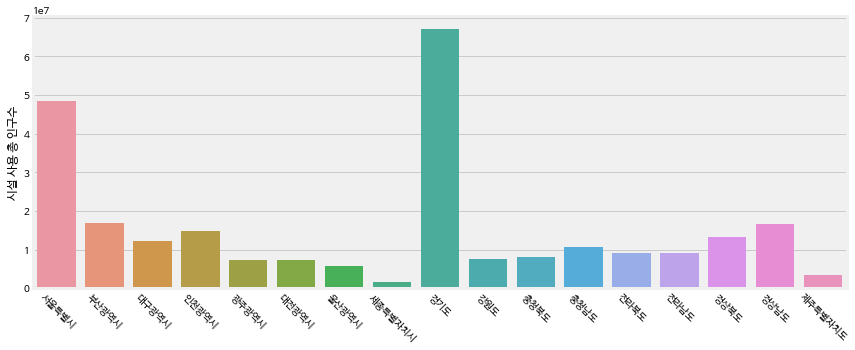

In [21]:
column_name = tdf_2020.columns

plt.figure(figsize=(13, 5))
plt.xticks(rotation = -45)
sns.barplot(x=column_name, y=tdf_2020.iloc[0])
plt.show()

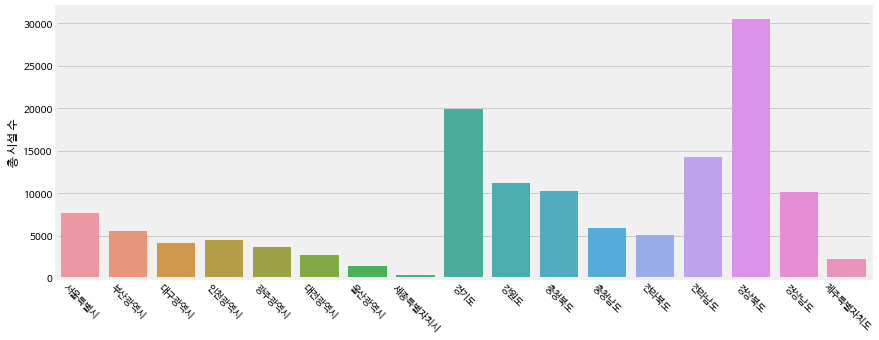

In [22]:
plt.figure(figsize=(13, 5))
plt.xticks(rotation = -45)
sns.barplot(x=column_name, y=tdf_2020.iloc[1])

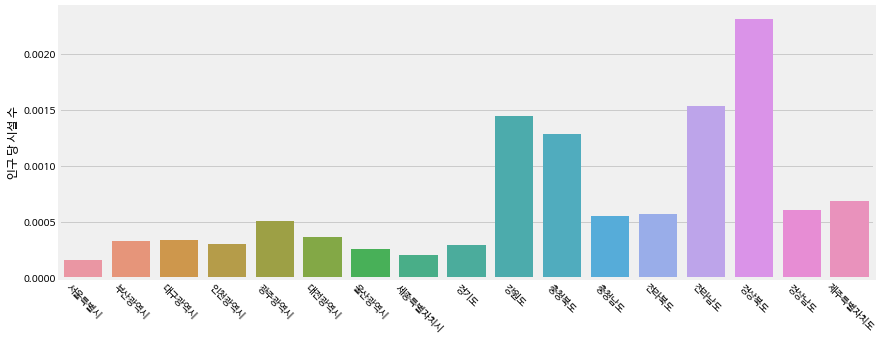

In [23]:
plt.figure(figsize=(13, 5))
plt.xticks(rotation = -45)
sns.barplot(x=column_name, y=tdf_2020.iloc[2])

### 2021년도

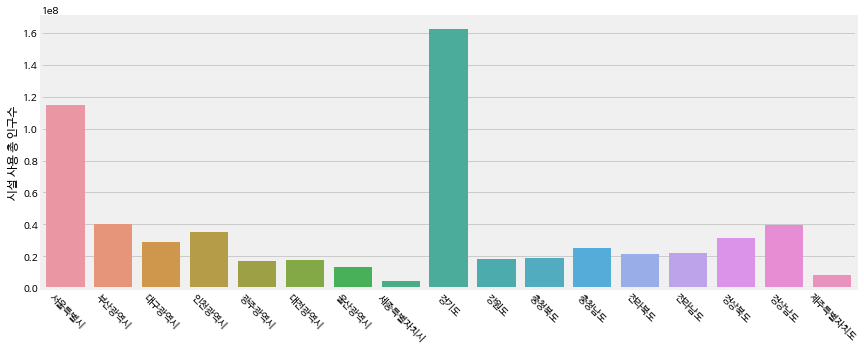

In [24]:
column_name = tdf_2021.columns

plt.figure(figsize=(13, 5))
plt.xticks(rotation = -45)
sns.barplot(x=column_name, y=tdf_2021.iloc[0])

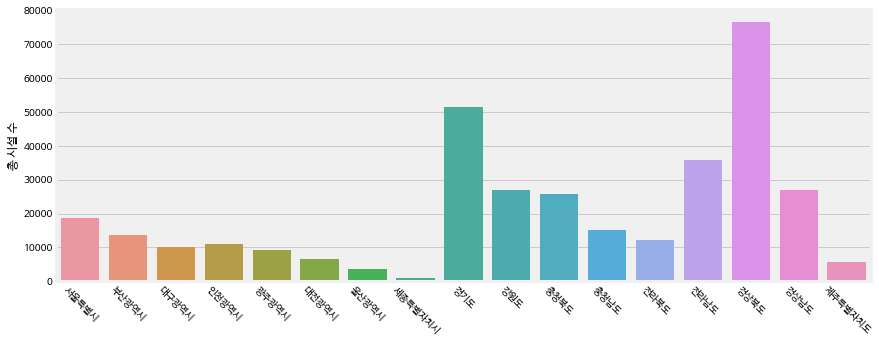

In [25]:
plt.figure(figsize=(13, 5))
plt.xticks(rotation = -45)
sns.barplot(x=column_name, y=tdf_2021.iloc[1])

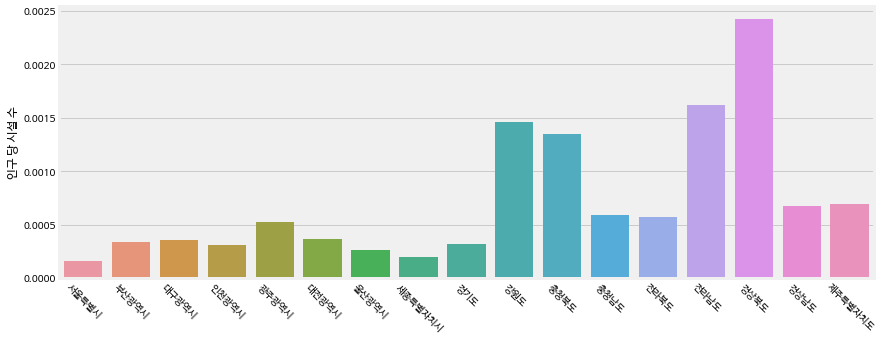

In [26]:
plt.figure(figsize=(13, 5))
plt.xticks(rotation = -45)
sns.barplot(x=column_name, y=tdf_2021.iloc[2])

### 2022년도

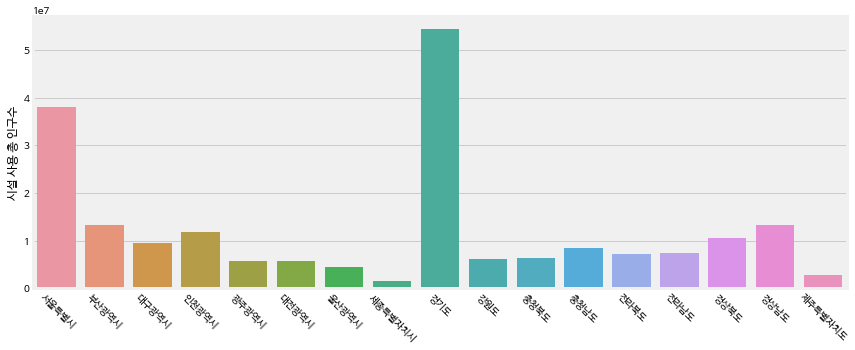

In [27]:
column_name = tdf_2022.columns

plt.figure(figsize=(13, 5))
plt.xticks(rotation = -45)
sns.barplot(x=column_name, y=tdf_2022.iloc[0])

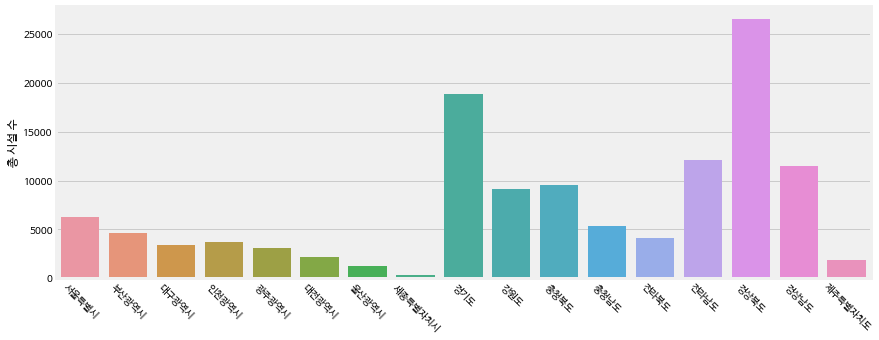

In [28]:
plt.figure(figsize=(13, 5))
plt.xticks(rotation = -45)
sns.barplot(x=column_name, y=tdf_2022.iloc[1])

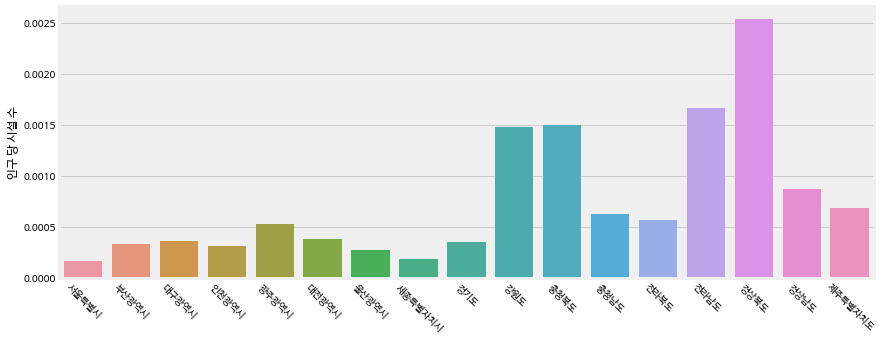

In [29]:
plt.figure(figsize=(13, 5))
plt.xticks(rotation = -45)
sns.barplot(x=column_name, y=tdf_2022.iloc[2])

# 지역별 동호회 빈도

## 데이터 로드

In [30]:
ksa_df = pd.read_csv('/content/drive/MyDrive/공모전1/drive-download-20221115T014610Z-001/Data/KS_AREA_ACCTO_SPORTS_CLUB_CRSTAT_INFO_202205.csv')
ksa_df.head()

,CLUB_NM,CTPRVN_NM,SIGNGU_NM,ITEM_NM,AFLTION_GROUP_NM,ITEM_CL_NM,SEXDSTN_FLAG_NM,MBER_CO,FOND_DE
0,NaN,제주특별자치도,제주특별자치도 제주시,볼링,체육동호인조직,"13세이하부,16세이하부,19세이하부,20세이상부",남성,18,20211021
1,보디빌딩피지크,경상북도,경상북도 구미시,보디빌딩,체육동호인조직,"13세이하부,16세이하부,19세이하부,20세이상부",남성,1,20211105
2,(사)창원요트클럽,경상남도,경상남도 창원시,요트,체육동호인조직,"13세이하부,16세이하부,19세이하부,20세이상부",혼성,6,20200616
3,(사)예산스포츠클럽,충청남도,충청남도 예산군,조정,공공스포츠클럽,"19세이하부,20세이상부",남성,19,20210708
4,굿,전라북도,전라북도 전주시,농구,체육동호인조직,"13세이하부,16세이하부,19세이하부,20세이상부",남성,21,20200106


## 데이터 전처리

In [31]:
ksa_df1 = ksa_df.drop(['CLUB_NM','FOND_DE'],axis = 1)

In [32]:
CTP = ksa_df1['CTPRVN_NM'].value_counts()
CTP.index

Index(['경기도', '서울특별시', '광주광역시', '대구광역시', '경상북도', '충청북도', '강원도', '제주특별자치도',
       '인천광역시', '부산광역시', '경상남도', '울산광역시', '전라북도', '전라남도', '충청남도', '대전광역시',
       '세종특별자치시'],
      dtype='object')

In [33]:
kk_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[0]].reset_index(drop=True)
seoul_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[1]].reset_index(drop=True)
kj_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[2]].reset_index(drop=True)
dg_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[3]].reset_index(drop=True)
kb_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[4]].reset_index(drop=True)
cb_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[5]].reset_index(drop=True)
kw_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[6]].reset_index(drop=True)
jj_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[7]].reset_index(drop=True)
ic_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[8]].reset_index(drop=True)
bs_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[9]].reset_index(drop=True)
kn_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[10]].reset_index(drop=True)
us_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[11]].reset_index(drop=True)
jb_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[12]].reset_index(drop=True)
jn_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[13]].reset_index(drop=True)
cn_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[14]].reset_index(drop=True)
dj_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[15]].reset_index(drop=True)
sj_df = ksa_df1[ksa_df1['CTPRVN_NM'] == CTP.index[16]].reset_index(drop=True)

In [34]:
kk_item = kk_df['ITEM_NM'].value_counts()
seoul_item = seoul_df['ITEM_NM'].value_counts()
kj_item = kj_df['ITEM_NM'].value_counts()
dg_item = dg_df['ITEM_NM'].value_counts()
kb_item = kb_df['ITEM_NM'].value_counts()
cb_item = cb_df['ITEM_NM'].value_counts()
kw_item = kw_df['ITEM_NM'].value_counts()
jj_item = jj_df['ITEM_NM'].value_counts()
ic_item = ic_df['ITEM_NM'].value_counts()
bs_item = bs_df['ITEM_NM'].value_counts()
kn_item = kn_df['ITEM_NM'].value_counts()
us_item = us_df['ITEM_NM'].value_counts()
jb_item = jb_df['ITEM_NM'].value_counts()
jn_item = jn_df['ITEM_NM'].value_counts()
cn_item = cn_df['ITEM_NM'].value_counts()
dj_item = dj_df['ITEM_NM'].value_counts()
sj_item = sj_df['ITEM_NM'].value_counts()

In [35]:
df = pd.concat([jj_item, kb_item, kn_item, cn_item, jb_item, kk_item, dg_item, kj_item, us_item, jn_item, bs_item, seoul_item, sj_item, cb_item, kw_item, ic_item, dj_item], axis = 1)
df

,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM,ITEM_NM
볼링,43.0,NaN,10.0,22.0,NaN,NaN,23.0,7.0,NaN,NaN,2.0,1.0,NaN,3.0,NaN,NaN,1.0
그라운드골프,36.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,1.0,NaN,8.0,1.0,3.0,NaN
게이트볼,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
야구소프트볼,10.0,76.0,43.0,33.0,9.0,97.0,45.0,79.0,34.0,25.0,50.0,51.0,11.0,39.0,51.0,33.0,38.0
펜싱,8.0,NaN,3.0,NaN,2.0,24.0,3.0,NaN,1.0,1.0,5.0,24.0,1.0,1.0,1.0,8.0,1.0
패러글라이딩,4.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN
요트,3.0,4.0,10.0,1.0,2.0,10.0,NaN,2.0,2.0,7.0,8.0,15.0,NaN,NaN,2.0,2.0,1.0
배구,3.0,10.0,4.0,6.0,8.0,24.0,8.0,16.0,9.0,6.0,7.0,38.0,2.0,22.0,16.0,16.0,6.0
검도,3.0,1.0,1.0,17.0,1.0,5.0,NaN,1.0,3.0,NaN,1.0,31.0,2.0,5.0,1.0,14.0,NaN
산악,2.0,2.0,NaN,1.0,2.0,10.0,NaN,1.0,NaN,NaN,NaN,NaN,4.0,5.0,5.0,3.0,NaN


In [36]:
df.columns = ksa_df1['CTPRVN_NM'].unique()

### 데이터 결측치 제거

In [37]:
df.fillna('0', inplace=True)

In [38]:
df = df.astype(int)

In [39]:
df

,제주특별자치도,경상북도,경상남도,충청남도,전라북도,경기도,대구광역시,광주광역시,울산광역시,전라남도,부산광역시,서울특별시,세종특별자치시,충청북도,강원도,인천광역시,대전광역시
볼링,43,0,10,22,0,0,23,7,0,0,2,1,0,3,0,0,1
그라운드골프,36,2,1,0,0,0,0,0,5,5,0,1,0,8,1,3,0
게이트볼,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
야구소프트볼,10,76,43,33,9,97,45,79,34,25,50,51,11,39,51,33,38
펜싱,8,0,3,0,2,24,3,0,1,1,5,24,1,1,1,8,1
패러글라이딩,4,0,1,0,1,1,1,0,0,0,0,0,0,0,3,1,0
요트,3,4,10,1,2,10,0,2,2,7,8,15,0,0,2,2,1
배구,3,10,4,6,8,24,8,16,9,6,7,38,2,22,16,16,6
검도,3,1,1,17,1,5,0,1,3,0,1,31,2,5,1,14,0
산악,2,2,0,1,2,10,0,1,0,0,0,0,4,5,5,3,0


In [40]:
df.index

Index(['볼링', '그라운드골프', '게이트볼', '야구소프트볼', '펜싱', '패러글라이딩', '요트', '배구', '검도',
       '산악', '롤러', '줄넘기', '탁구', '보디빌딩', '수영', '치어리딩', '스쿼시', '태권도', '킥복싱',
       '소프트테니스', '합기도', '농구', '테니스', '역도', '카라테', '사격', '씨름', '럭비', '주짓수',
       '세팍타크로', '에어로빅힙합', '파워보트', '수상스키·웨이크보드', '댄스스포츠', '조정', '육상', '하키',
       '복싱', '빙상', '스키', '골프', '레슬링', '우슈', '근대5종', '아이스하키', '루지'],
      dtype='object')

In [41]:
df.sort_values(by='대전광역시', ascending = False)

,제주특별자치도,경상북도,경상남도,충청남도,전라북도,경기도,대구광역시,광주광역시,울산광역시,전라남도,부산광역시,서울특별시,세종특별자치시,충청북도,강원도,인천광역시,대전광역시
야구소프트볼,10,76,43,33,9,97,45,79,34,25,50,51,11,39,51,33,38
농구,1,13,2,8,37,52,45,14,21,3,21,45,3,17,16,7,9
주짓수,0,0,2,0,1,16,1,2,0,0,1,7,2,3,0,0,6
배구,3,10,4,6,8,24,8,16,9,6,7,38,2,22,16,16,6
수영,1,4,4,3,0,13,3,16,0,4,2,28,0,2,3,3,6
사격,0,1,5,1,5,14,8,1,2,1,2,13,0,4,6,1,3
롤러,2,1,5,2,6,22,11,3,5,4,2,4,0,3,2,0,3
역도,0,1,3,0,0,0,0,1,3,0,0,0,0,0,0,0,2
치어리딩,1,1,1,1,0,7,0,0,1,0,1,7,2,1,0,1,2
킥복싱,1,0,2,1,0,1,0,0,0,0,0,0,0,2,3,1,2


In [42]:
df.columns

Index(['제주특별자치도', '경상북도', '경상남도', '충청남도', '전라북도', '경기도', '대구광역시', '광주광역시',
       '울산광역시', '전라남도', '부산광역시', '서울특별시', '세종특별자치시', '충청북도', '강원도', '인천광역시',
       '대전광역시'],
      dtype='object')

In [43]:
df.iloc[:,1].sort_values(ascending=False)

야구소프트볼        76
소프트테니스        26
탁구            14
농구            13
배구            10
테니스           10
줄넘기            6
요트             4
수영             4
스쿼시            3
그라운드골프         2
산악             2
보디빌딩           2
사격             1
카라테            1
역도             1
치어리딩           1
롤러             1
검도             1
수상스키·웨이크보드     0
레슬링            0
골프             0
스키             0
우슈             0
근대5종           0
아이스하키          0
빙상             0
복싱             0
하키             0
육상             0
조정             0
댄스스포츠          0
볼링             0
파워보트           0
에어로빅힙합         0
세팍타크로          0
주짓수            0
럭비             0
씨름             0
합기도            0
킥복싱            0
태권도            0
패러글라이딩         0
펜싱             0
게이트볼           0
루지             0
Name: 경상북도, dtype: int64

## 시각화

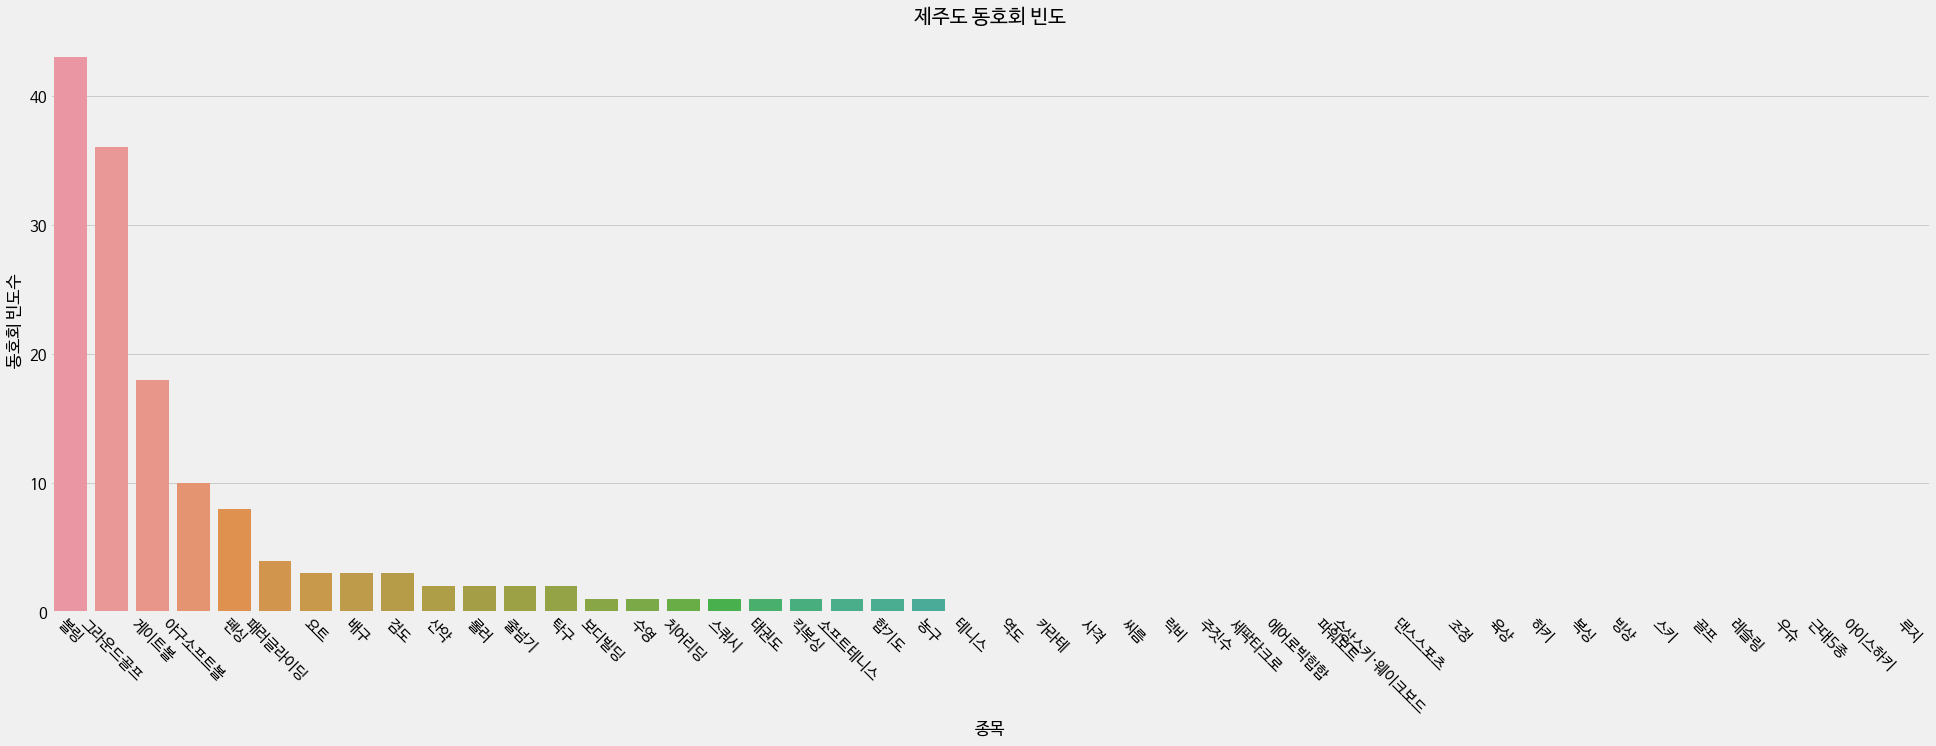

In [44]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,0].values)
plt.title("제주도 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

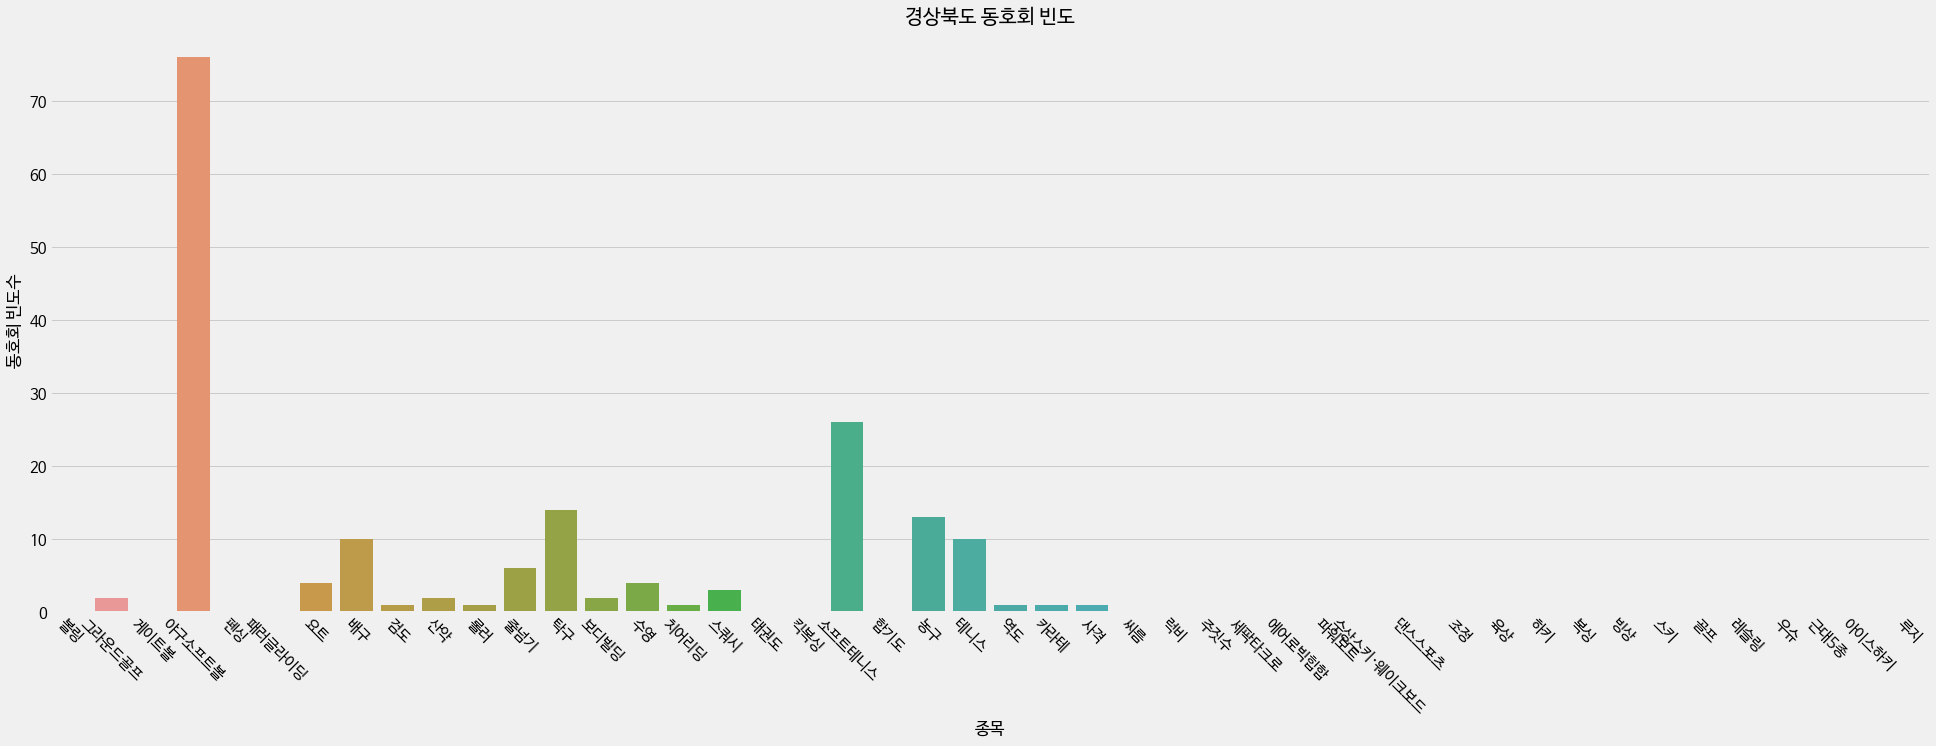

In [45]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,1].values)
plt.title("경상북도 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

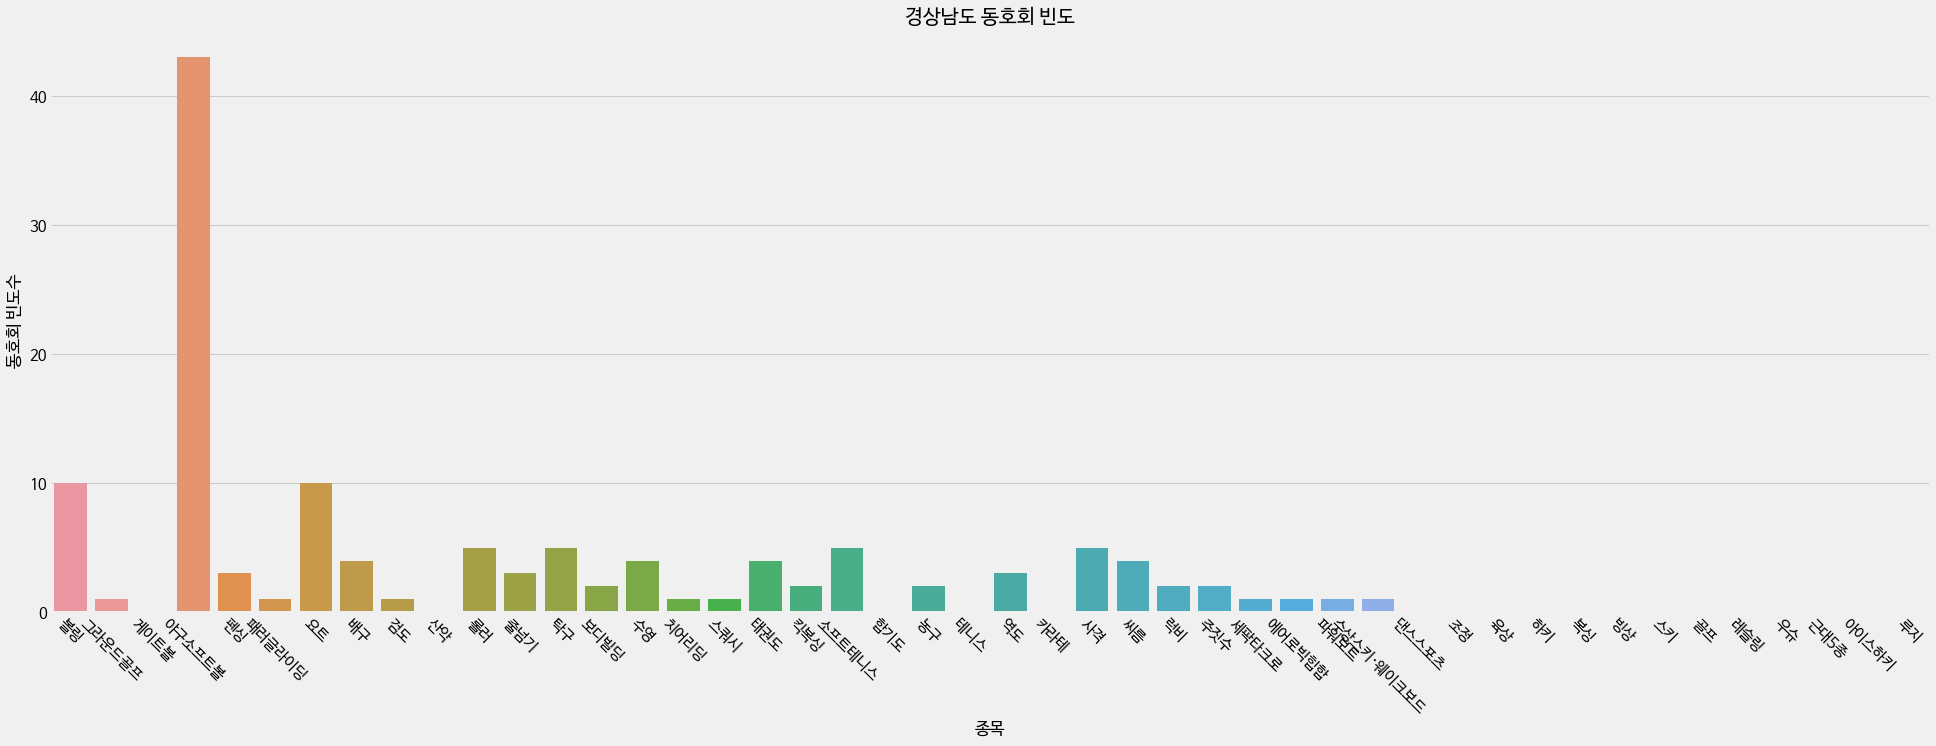

In [46]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,2].values)
plt.title("경상남도 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

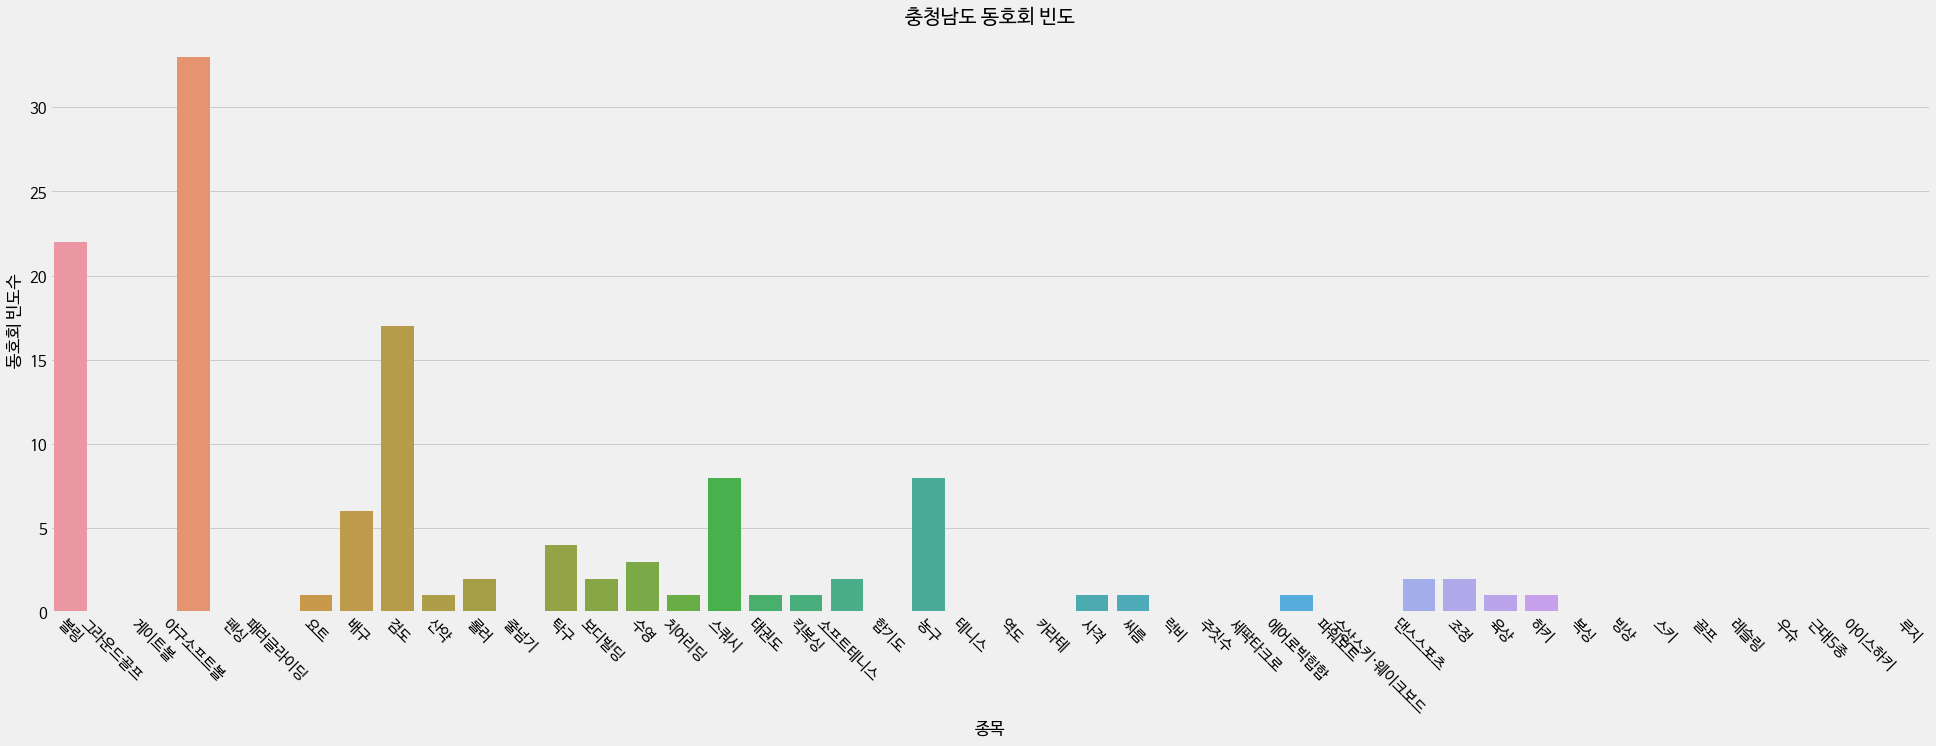

In [47]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,3].values)
plt.title("충청남도 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

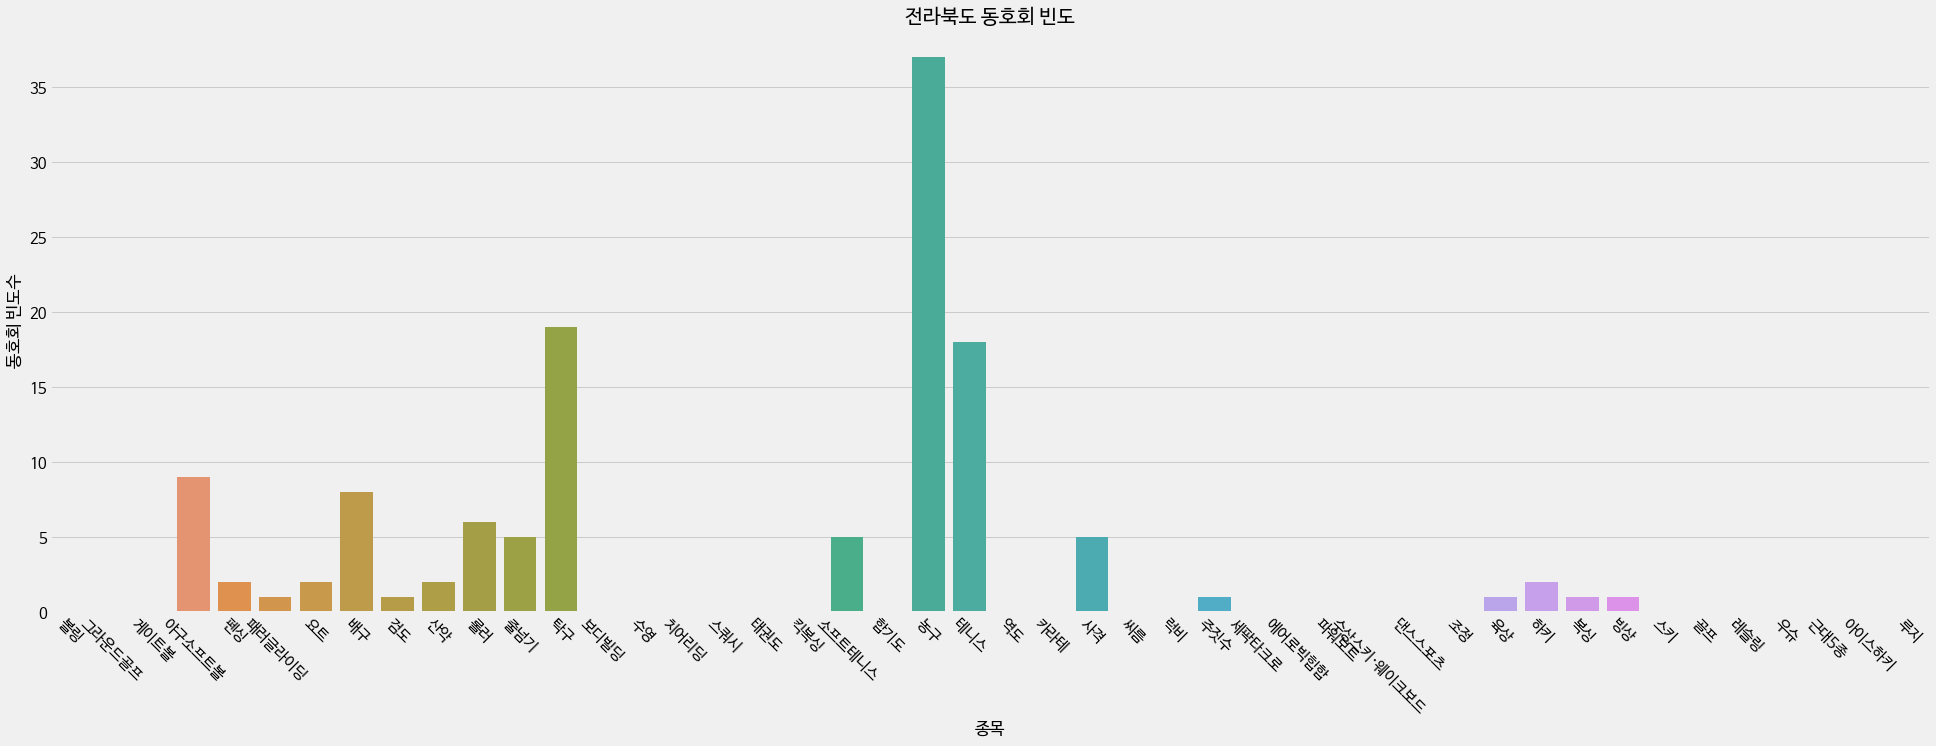

In [48]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,4].values)
plt.title("전라북도 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

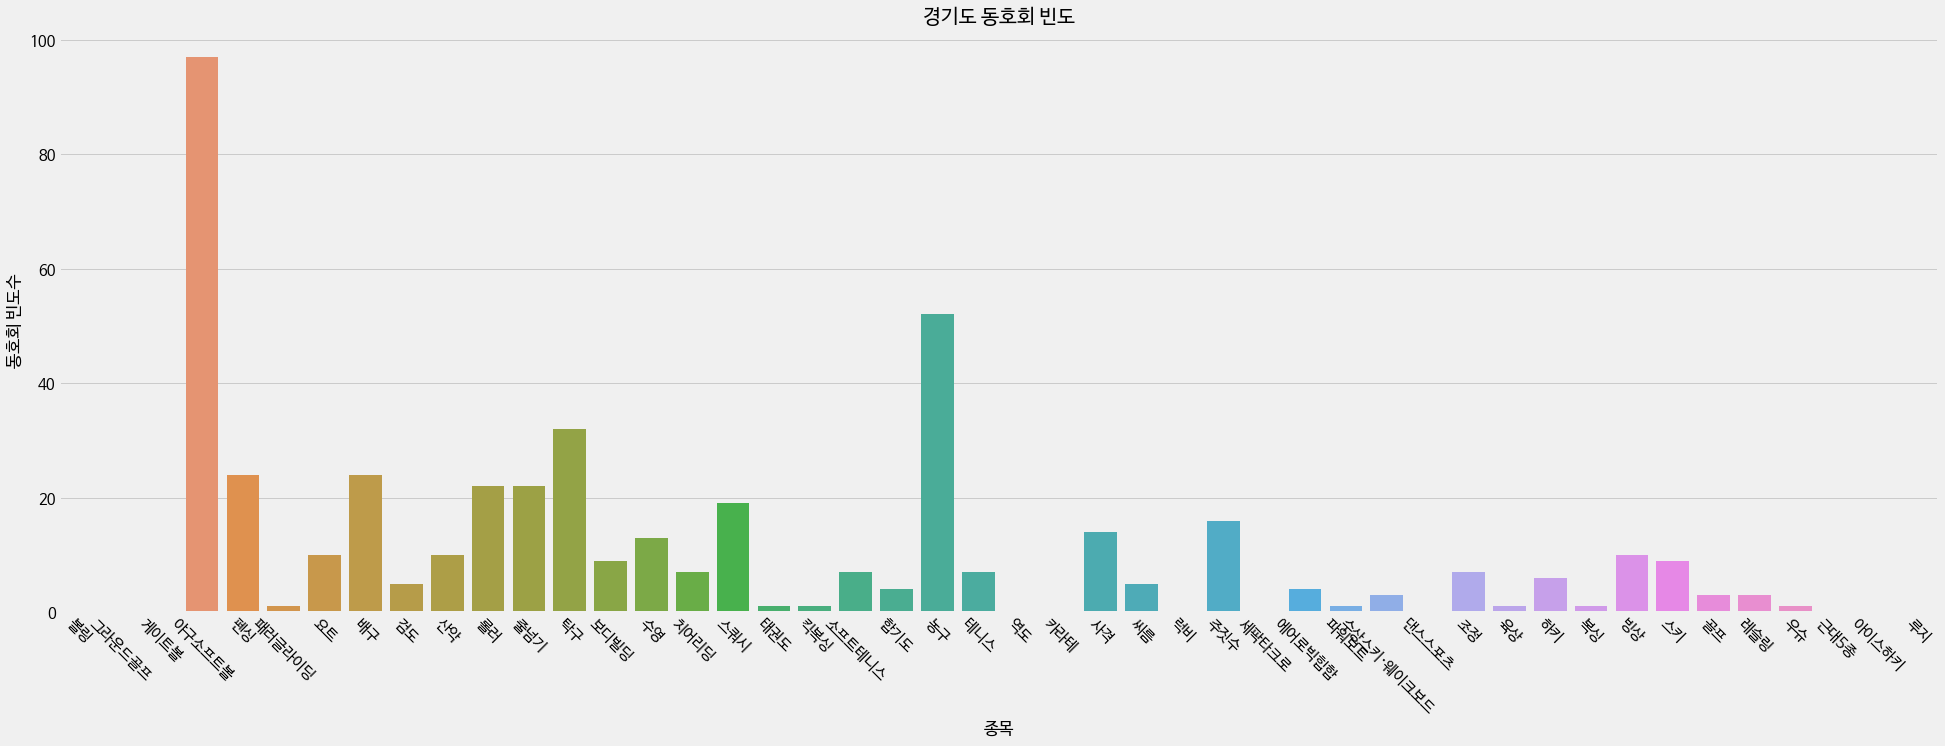

In [49]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,5].values)
plt.title("경기도 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

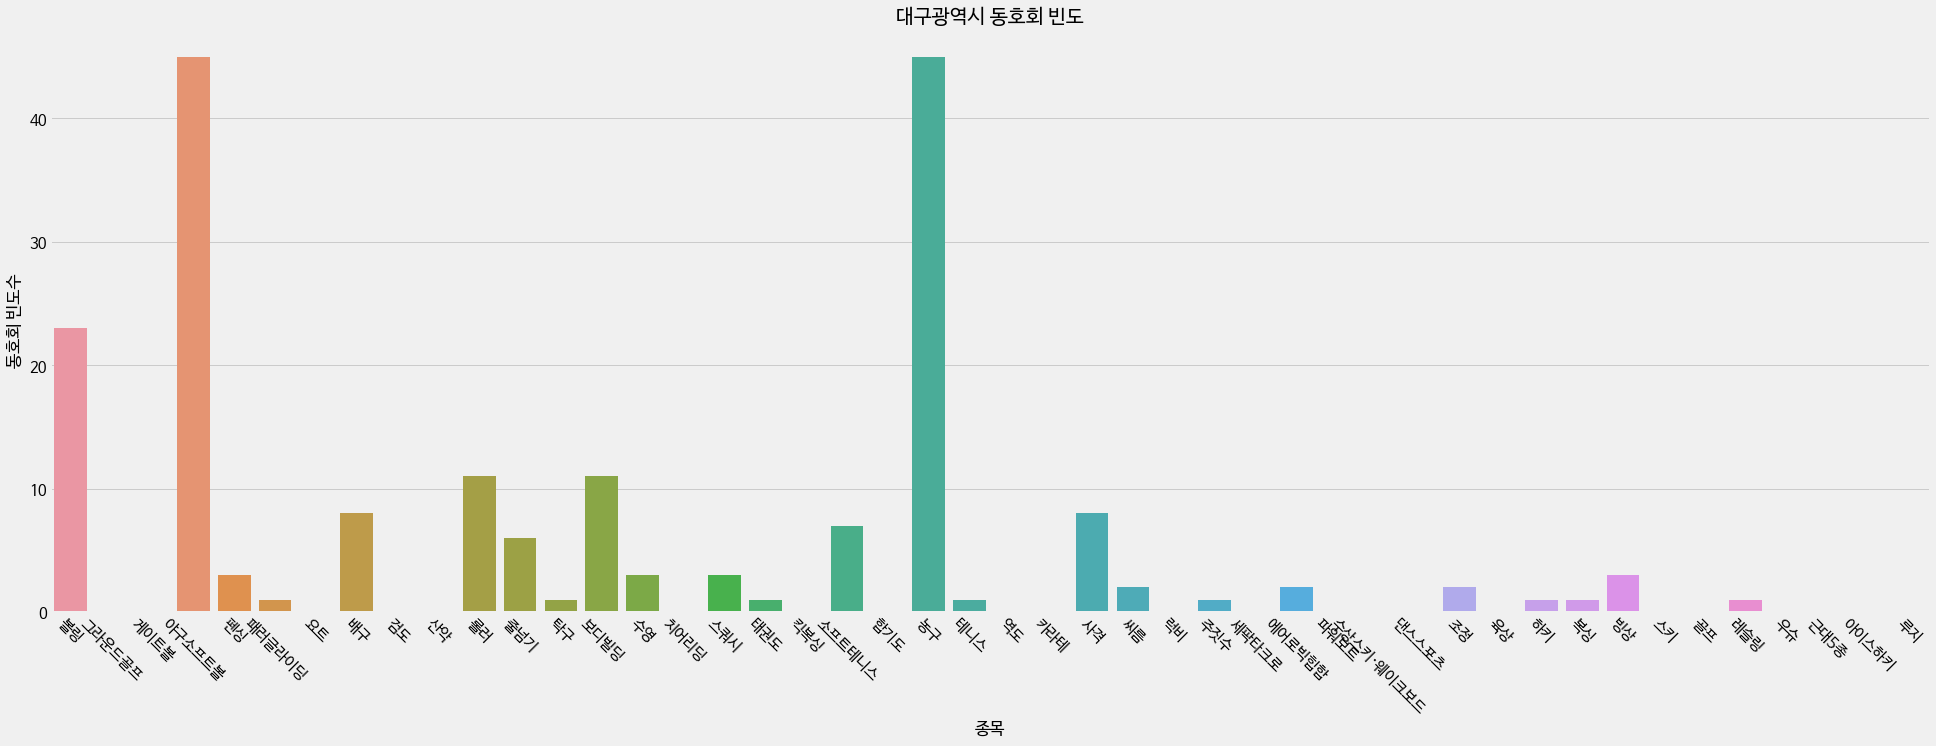

In [50]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,6].values)
plt.title("대구광역시 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

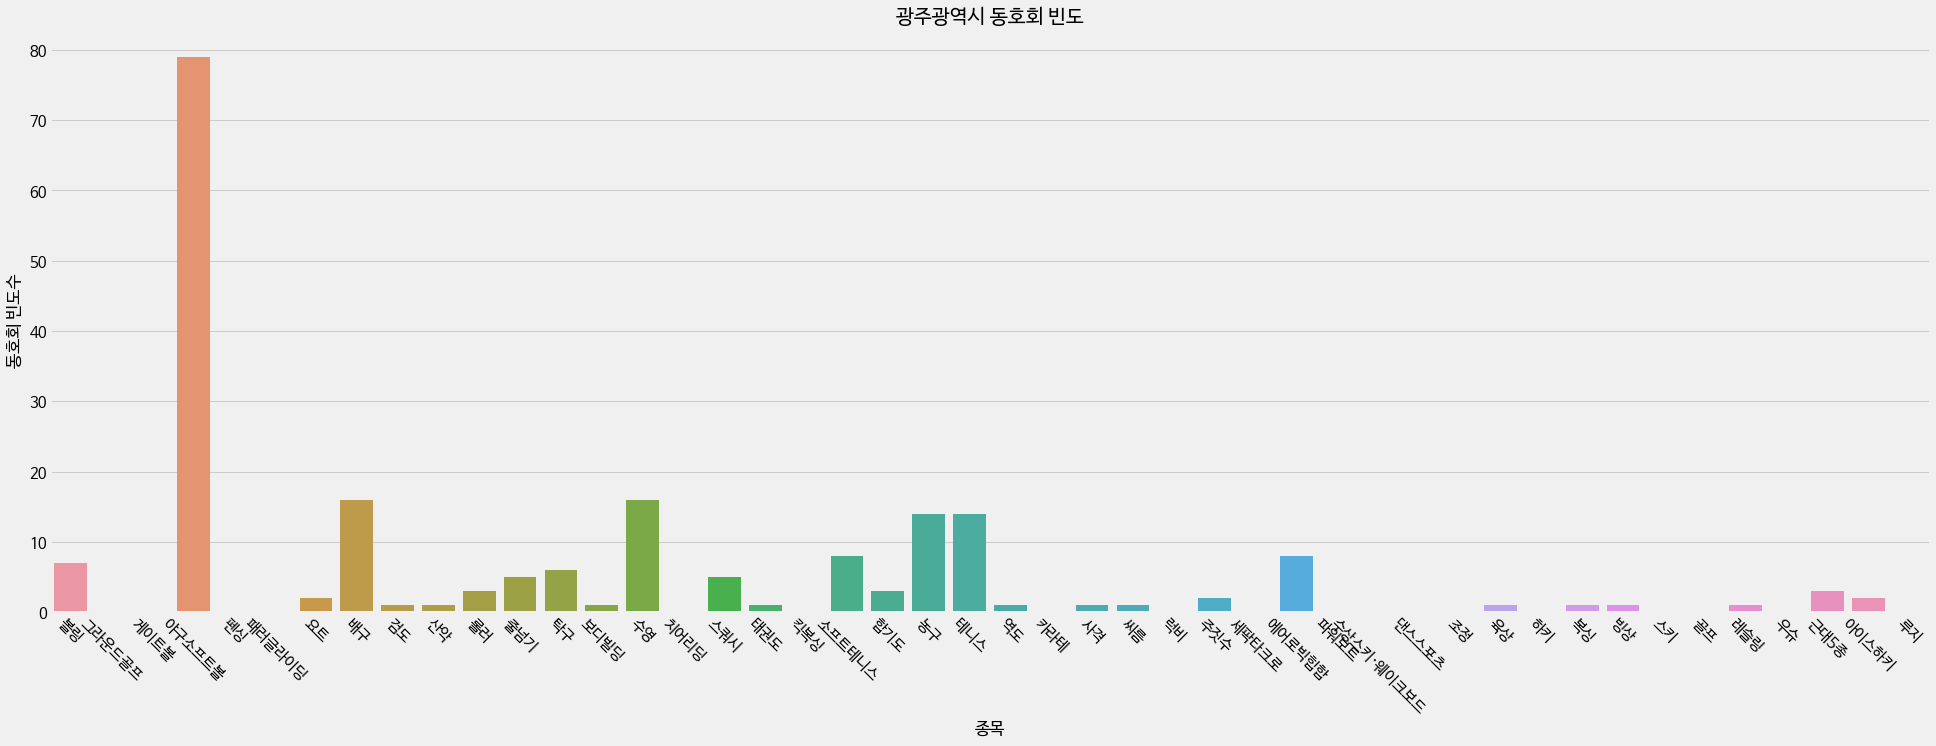

In [51]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,7].values)
plt.title("광주광역시 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

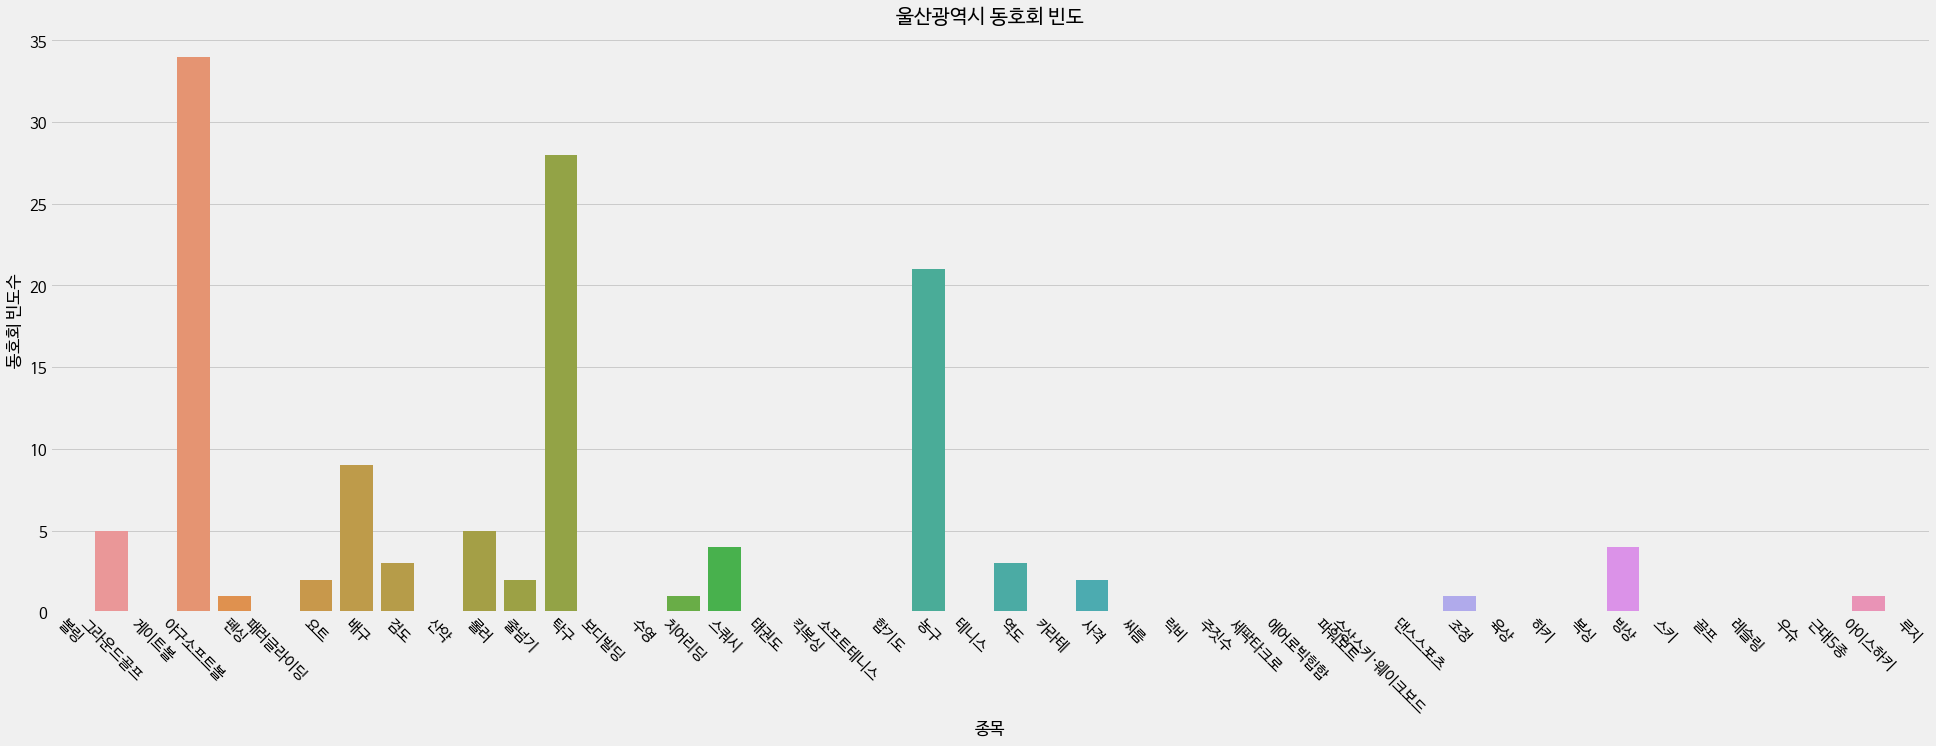

In [52]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,8].values)
plt.title("울산광역시 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

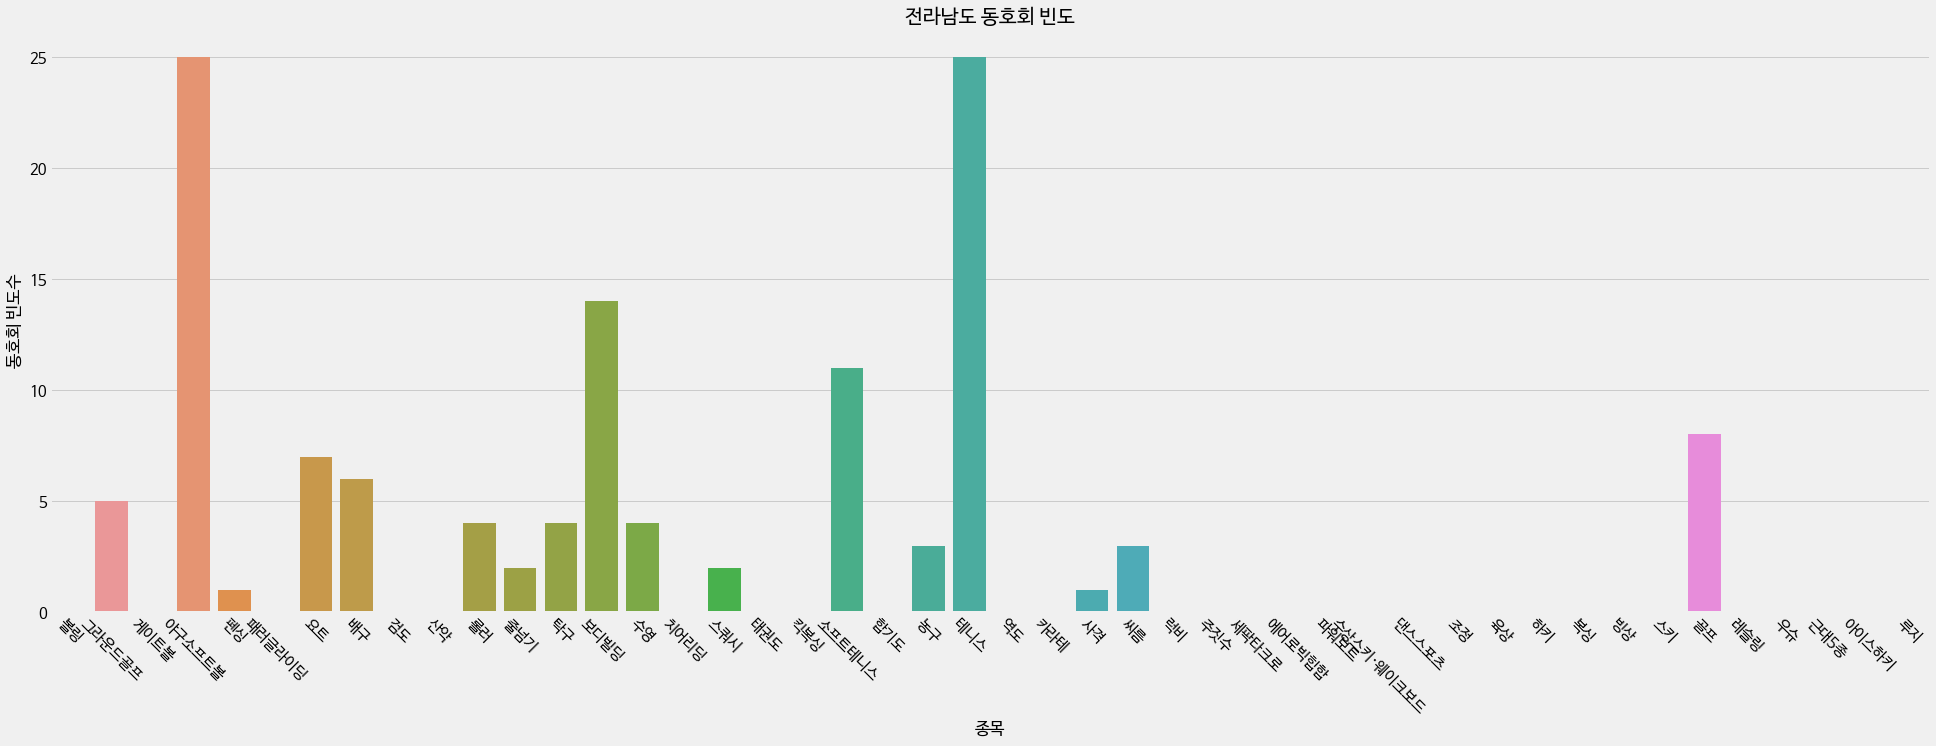

In [53]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,9].values)
plt.title("전라남도 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

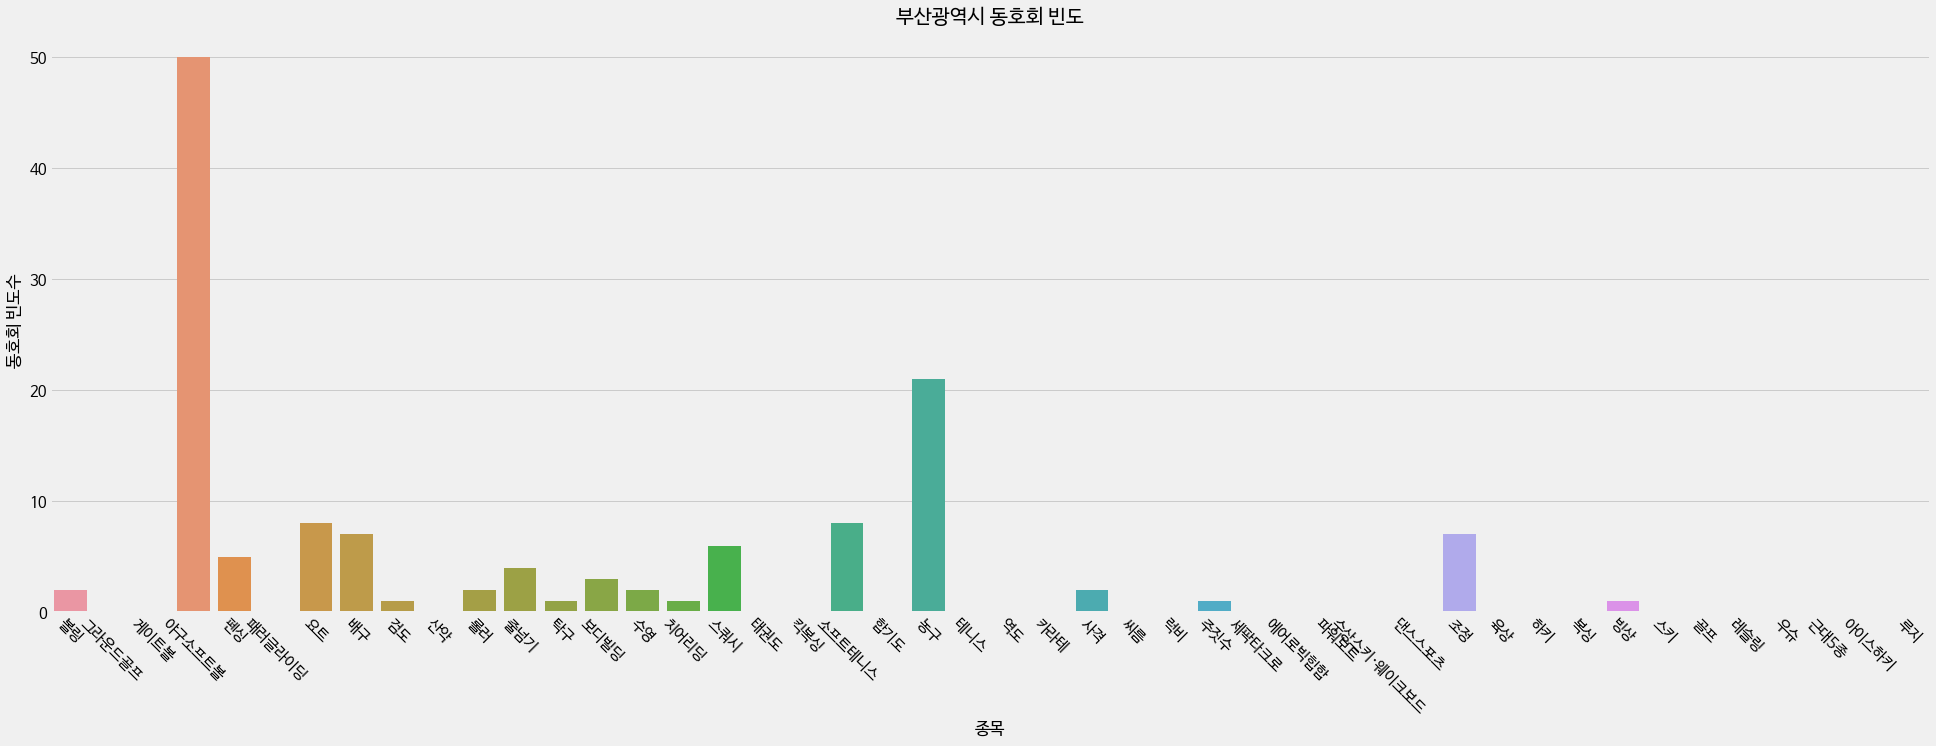

In [54]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,10].values)
plt.title("부산광역시 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

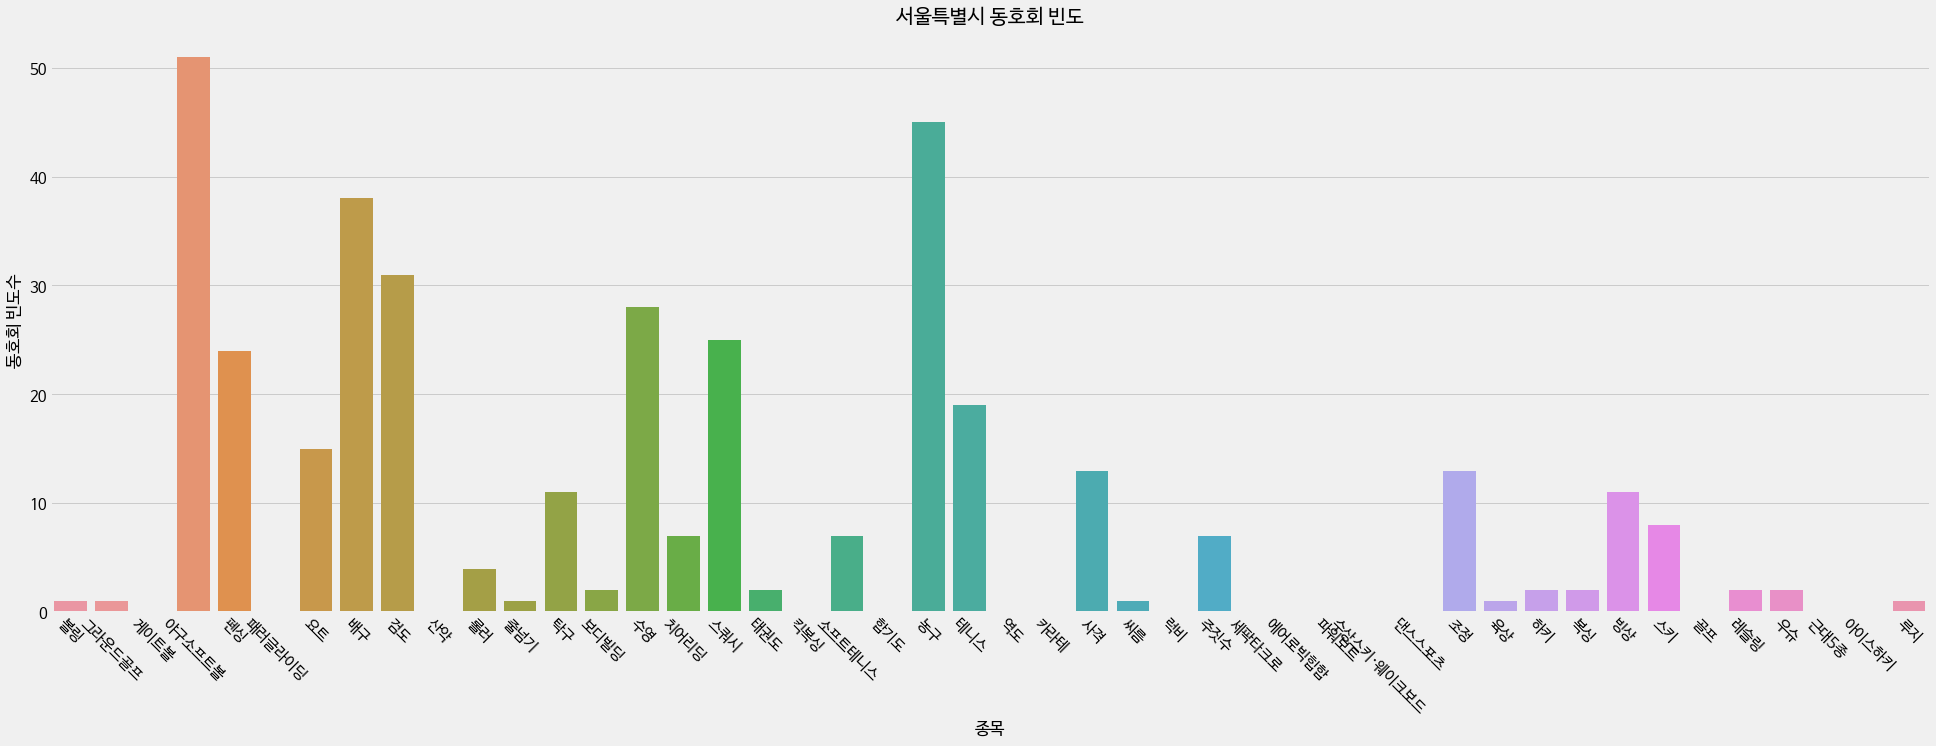

In [55]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,11].values)
plt.title("서울특별시 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

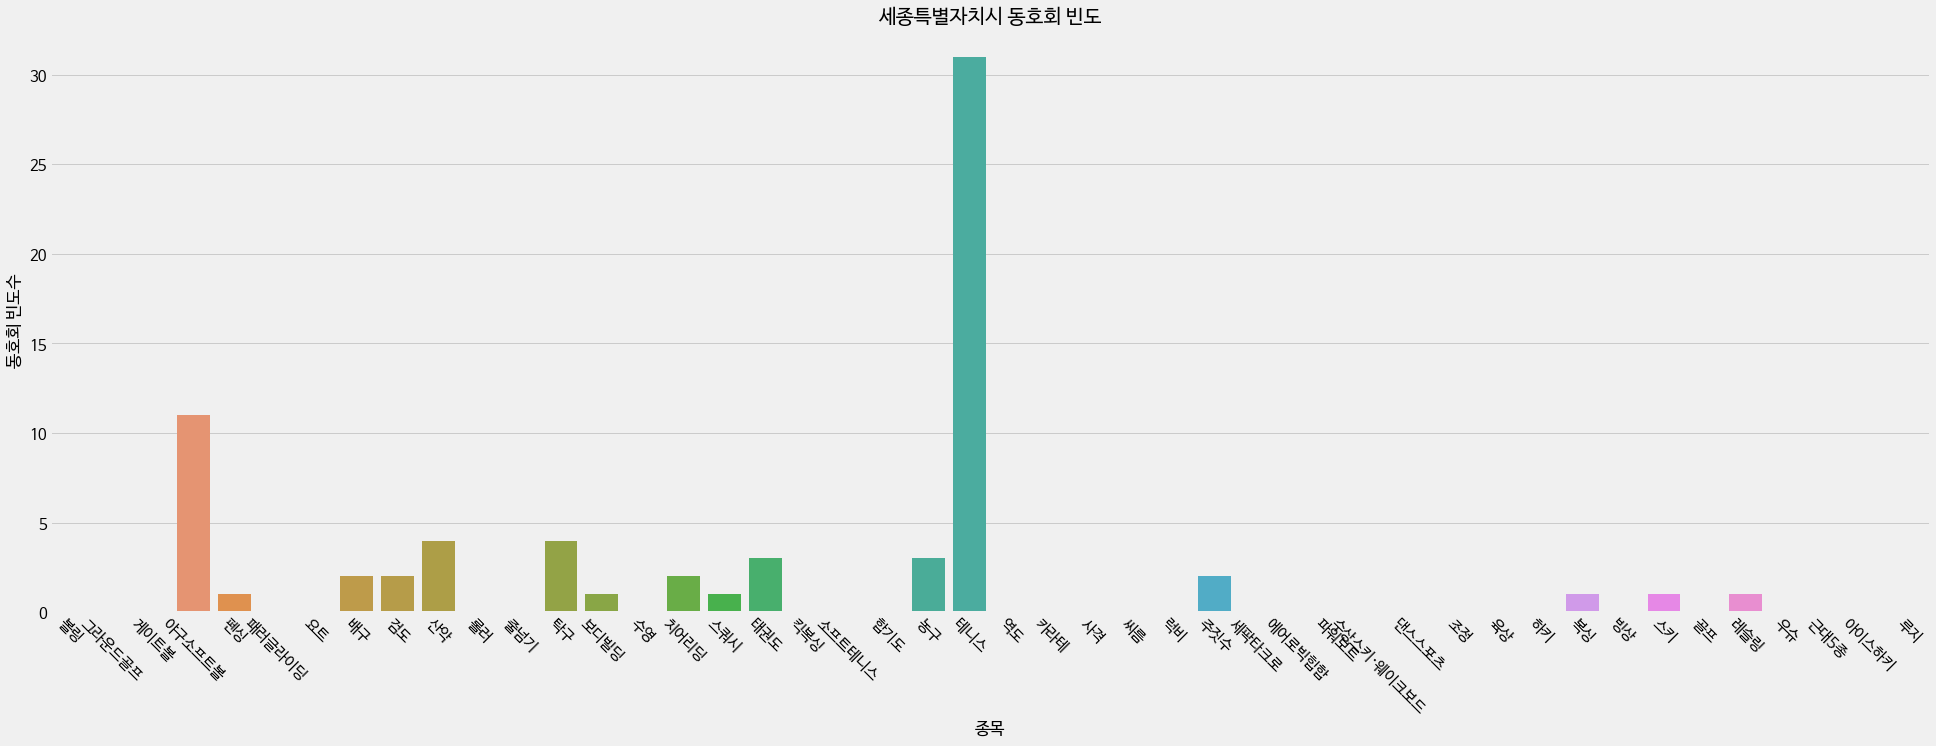

In [56]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,12].values)
plt.title("세종특별자치시 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

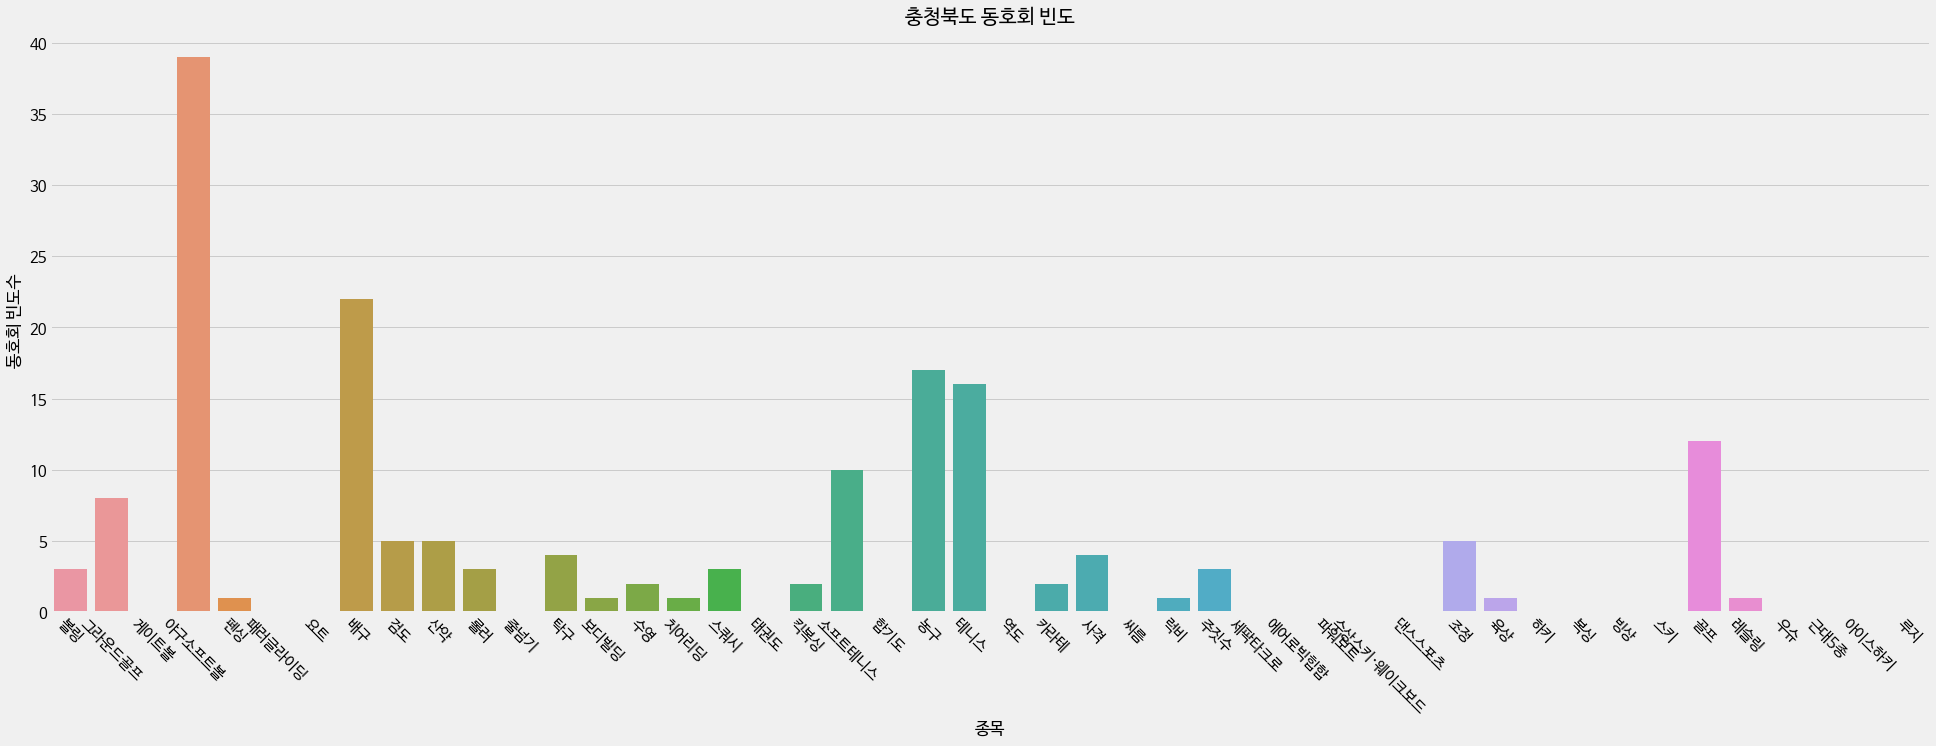

In [57]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,13].values)
plt.title("충청북도 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

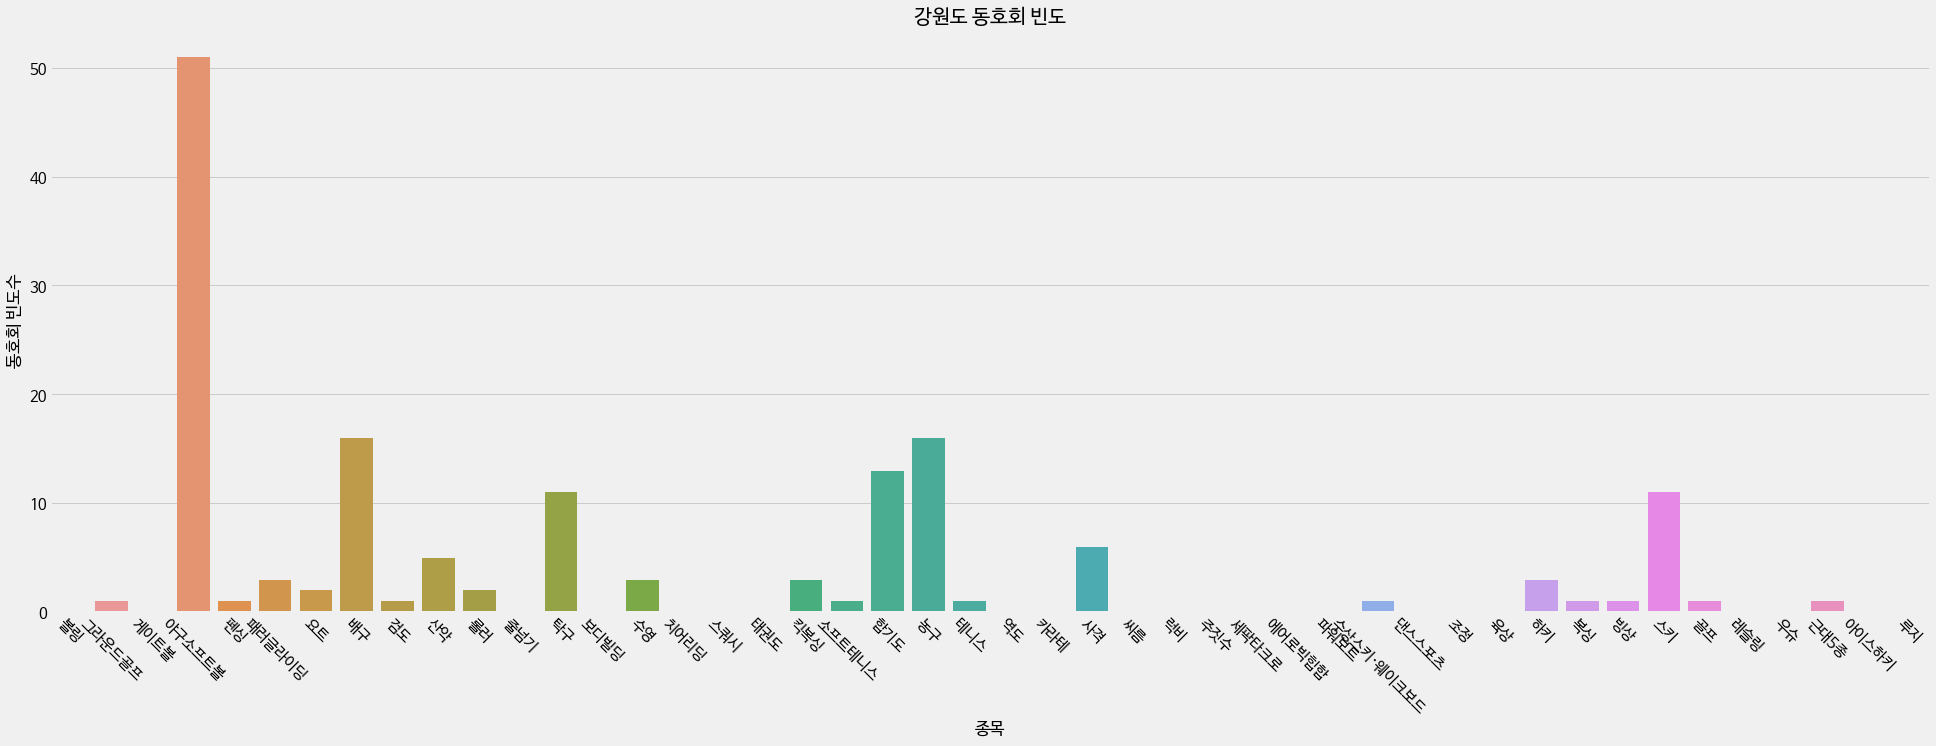

In [58]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,14].values)
plt.title("강원도 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

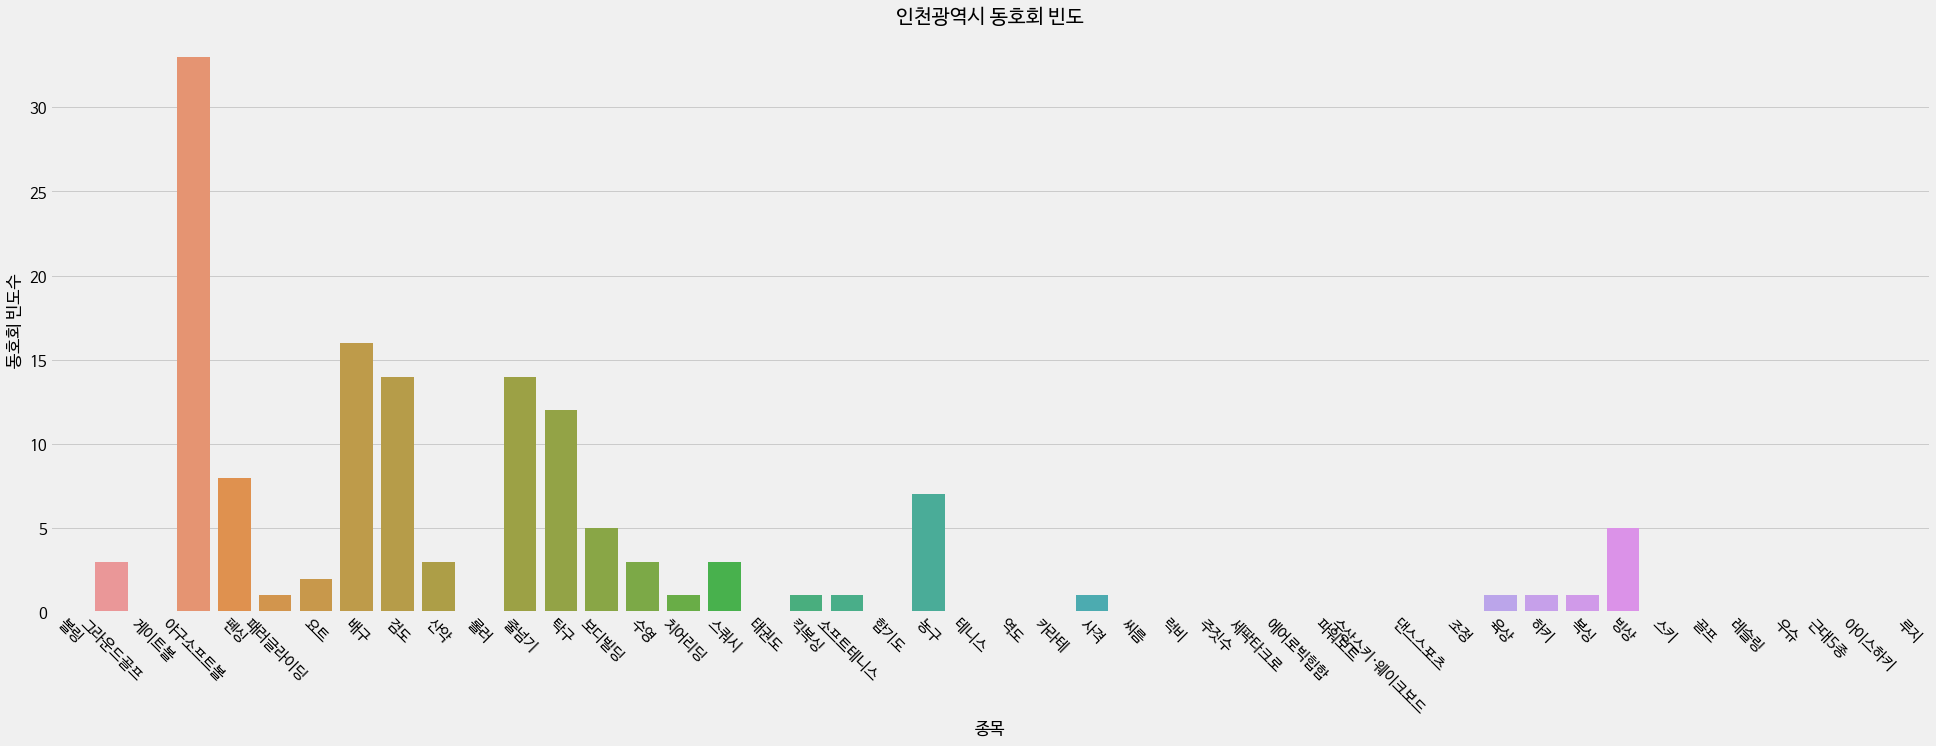

In [59]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,15].values)
plt.title("인천광역시 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

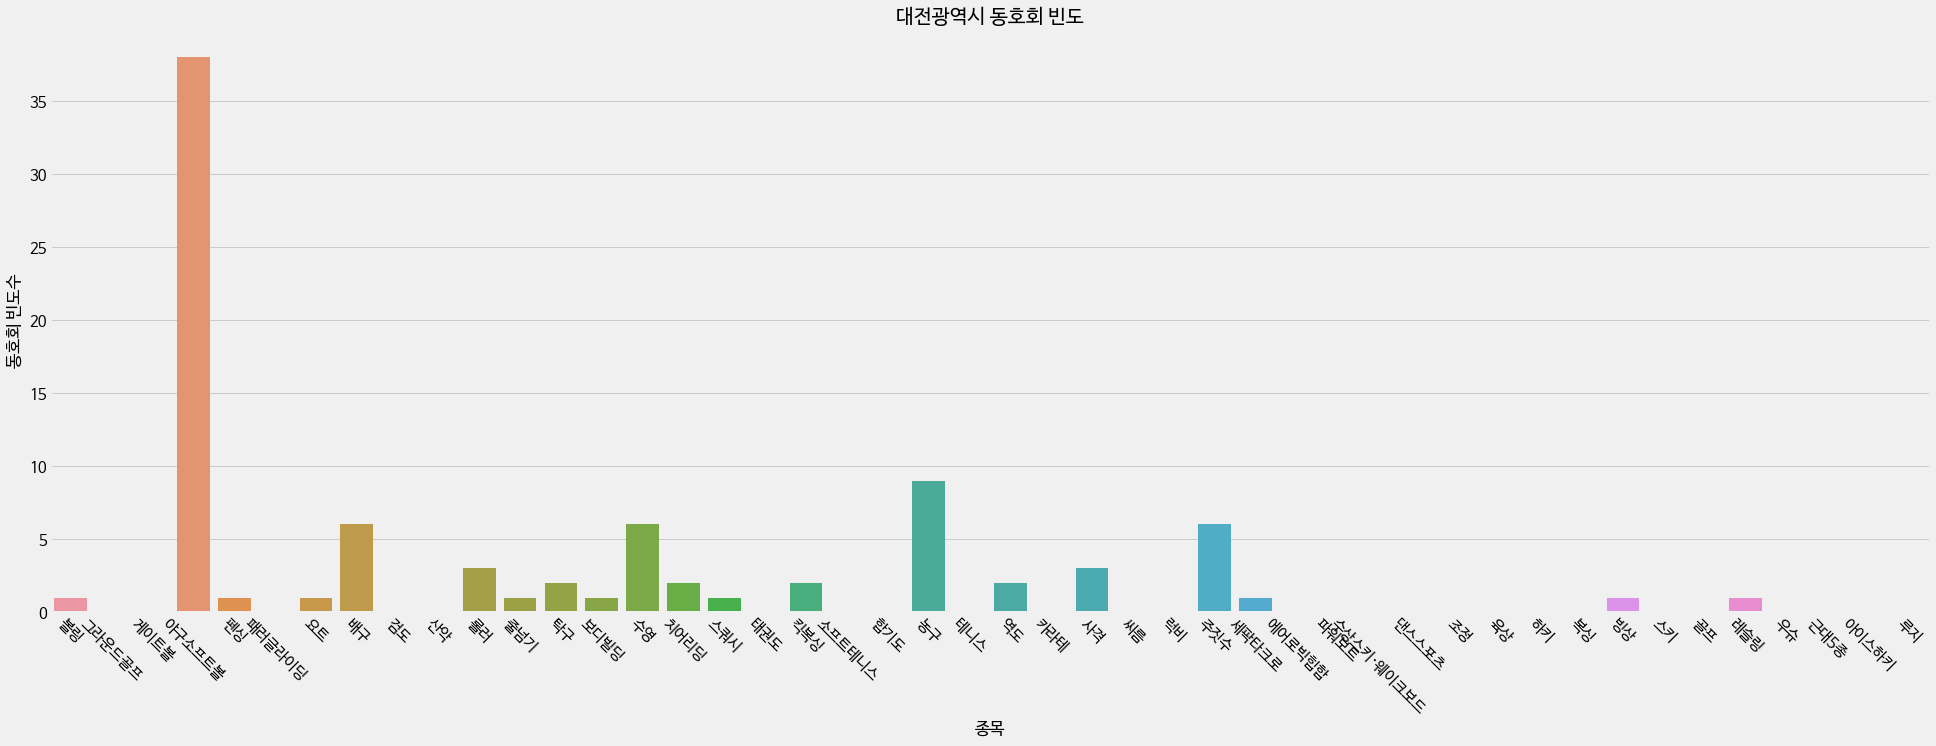

In [60]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 10))
sns.barplot(x=df.index, y=df.iloc[:,16].values)
plt.title("대전광역시 동호회 빈도", size=20)
plt.xlabel("종목", fontsize=17)
plt.ylabel("동호회 빈도수", fontsize=17)
plt.xticks(rotation = -45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# 공공체육시설

In [61]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!apt -qq -y install fonts-nanum
fontpath = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = fm.FontProperties(fname=fontpath, size=14).get_name()
print(font)
plt.rc("font", family=font)
# fm._rebuild()
mpl.rcParams["axes.unicode_minus"]

import seaborn as sns

from plotnine import *

import folium

import warnings
warnings.filterwarnings("ignore")

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
NanumBarunGothic


## 데이터 로드

In [82]:
df = pd.read_csv("/content/drive/MyDrive/공모전1/drive-download-20221115T014610Z-001/Data/KS_WNTY_PHSTRN_FCLTY_STTUS_202205.csv")

In [83]:
df

,FACI_NM,FACI_GB_CD,FACI_GB_NM,FCOB_CD,FCOB_NM,FTYPE_CD,FTYPE_NM,FACI_STAT,FACI_ROAD_POST,FACI_ROAD_ADDR1,...,CP_YMD,TH_YMD,SDWN_YMD,NATION_YN,SSM_DSN_YN,ATNM_CHK_YN,DATA_FROM_GB_CD,DEL_YN,REG_DT,UPD_DT
0,(외립석입구),P,공공,P08,간이운동장,P0801,간이운동장,정상운영,NaN,NaN,...,NaN,NaN,NaN,N,NaN,N,NaN,N,2020-02-10,2020-02-10
1,(주)한샘레포츠타운(공단점),N,신고,N10,체력단련장업,N1001,체력단련장,정상운영,15433.0,경기도 안산시 단원구 동산로 63 (원시동),...,NaN,NaN,NaN,N,NaN,Y,NaN,N,2016-12-31,2017-02-26
2,(자산경로당),P,공공,P08,간이운동장,P0801,간이운동장,정상운영,39588.0,경상북도 김천시 자산3길 16 (성내동),...,NaN,NaN,NaN,N,NaN,N,SFMS,N,2020-02-10,2021-04-29
3,볼&큐 빌리어드클럽,N,신고,N11,당구장업,N1101,당구장,정상운영,426811.0,"경기도 안산시 상록구 반석로 88, 4층 (본오동)",...,NaN,NaN,NaN,N,NaN,Y,태블릿,N,2016-12-31,2019-01-14
4,안산 힘찬 태권도,N,신고,N08,체육도장업,N0805,태권도,정상운영,15535.0,경기도 안산시 상록구 각골로 127 (본오동),...,NaN,NaN,NaN,N,NaN,Y,SFMS,N,2016-12-31,2019-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114004,美 Diet Boxing Club,N,신고,N08,체육도장업,N0801,권투,정상운영,7262.0,서울특별시 영등포구 영등포로 85-1 (양평동1가),...,NaN,NaN,NaN,N,NaN,Y,태블릿,N,2016-12-30,2019-01-03
114005,우리 아이풀(舊 크레피아수영장),N,신고,N07,수영장업,N0701,실내,정상운영,302800.0,대전광역시 서구 계백로 1186 (가수원동),...,NaN,NaN,NaN,N,N,N,NaN,N,2016-12-31,2018-09-19
114006,태권道장 휘영찬,N,신고,N08,체육도장업,N0805,태권도,정상운영,302812.0,"대전광역시 서구 관저동로 66 (관저동, 3층)",...,NaN,NaN,NaN,N,NaN,Y,NaN,N,2016-12-31,2018-09-20
114007,道心성인태권도,N,신고,N08,체육도장업,N0805,태권도,정상운영,1384.0,서울특별시 도봉구 방학로 175(방학동),...,NaN,NaN,NaN,N,NaN,Y,SFMS,N,2021-09-01,2021-09-01


## 데이터 전처리

In [84]:
df1 = df.copy()
df1 = df[['FACI_NM','FMNG_CP_NM','FMNG_CPB_NM','FACI_ROAD_ADDR1']]

### 결측치 처리

In [85]:
df1.isna().sum()

FACI_NM                0
FMNG_CP_NM         37791
FMNG_CPB_NM        38530
FACI_ROAD_ADDR1    12700
dtype: int64

In [86]:
df1["FACI_ROAD_ADDR1"].fillna('없음', inplace=True)

In [87]:
df1.isna().sum()

FACI_NM                0
FMNG_CP_NM         37791
FMNG_CPB_NM        38530
FACI_ROAD_ADDR1        0
dtype: int64

In [88]:
df1

,FACI_NM,FMNG_CP_NM,FMNG_CPB_NM,FACI_ROAD_ADDR1
0,(외립석입구),경상북도,김천시,없음
1,(주)한샘레포츠타운(공단점),경기도,안산시,경기도 안산시 단원구 동산로 63 (원시동)
2,(자산경로당),경상북도,김천시,경상북도 김천시 자산3길 16 (성내동)
3,볼&큐 빌리어드클럽,경기도,안산시,"경기도 안산시 상록구 반석로 88, 4층 (본오동)"
4,안산 힘찬 태권도,경기도,안산시,경기도 안산시 상록구 각골로 127 (본오동)
...,...,...,...,...
114004,美 Diet Boxing Club,서울특별시,영등포구,서울특별시 영등포구 영등포로 85-1 (양평동1가)
114005,우리 아이풀(舊 크레피아수영장),대전광역시,서구,대전광역시 서구 계백로 1186 (가수원동)
114006,태권道장 휘영찬,대전광역시,서구,"대전광역시 서구 관저동로 66 (관저동, 3층)"
114007,道心성인태권도,NaN,NaN,서울특별시 도봉구 방학로 175(방학동)


In [89]:
df1['FMNG_CP_NM'].isna().sum()

37791

In [90]:
l = df1['FMNG_CP_NM'].isna().values.tolist()

for i in range(len(l)):
    if l[i]==True:
        df1.FMNG_CP_NM[i] = df1.FACI_ROAD_ADDR1[i].split(" ")[0]

In [91]:
df1['FMNG_CP_NM'].value_counts()

경기도          26038
서울특별시        16964
경상북도         10498
경상남도          7863
전라남도          5944
             ...  
문화회관2길           1
현서면              1
반송동              1
오들1길             1
동문대로248번길        1
Name: FMNG_CP_NM, Length: 329, dtype: int64

In [92]:
total_df = df1[['FMNG_CP_NM']]

In [93]:
total_df

,FMNG_CP_NM
0,경상북도
1,경기도
2,경상북도
3,경기도
4,경기도
...,...
114004,서울특별시
114005,대전광역시
114006,대전광역시
114007,서울특별시


### 중복된 데이터 처리

In [94]:
total_df['FMNG_CP_NM'].replace('서울','서울특별시',inplace=True)
total_df['FMNG_CP_NM'].replace('서울시','서울특별시',inplace=True)
total_df['FMNG_CP_NM'].replace('광주','경기도',inplace=True)
total_df['FMNG_CP_NM'].replace('광주시','경기도',inplace=True)
total_df['FMNG_CP_NM'].replace('부산','부산광역시',inplace=True)
total_df['FMNG_CP_NM'].replace('부산시','부산광역시',inplace=True)
total_df['FMNG_CP_NM'].replace('경남','경상남도',inplace=True)
total_df['FMNG_CP_NM'].replace('경북','경상북도',inplace=True)
total_df['FMNG_CP_NM'].replace('전남','전라남도',inplace=True)
total_df['FMNG_CP_NM'].replace('전북','전라북도',inplace=True)
total_df['FMNG_CP_NM'].replace('경기','경기도',inplace=True)
total_df['FMNG_CP_NM'].replace('강원','강원도',inplace=True)
total_df['FMNG_CP_NM'].replace('대전','대전광역시',inplace=True)
total_df['FMNG_CP_NM'].replace('대전시','대전광역시',inplace=True)
total_df['FMNG_CP_NM'].replace('울산','울산광역시',inplace=True)
total_df['FMNG_CP_NM'].replace('울산시','울산광역시',inplace=True)
total_df['FMNG_CP_NM'].replace('인천','인천광역시',inplace=True)
total_df['FMNG_CP_NM'].replace('인천시','인천광역시',inplace=True)
total_df['FMNG_CP_NM'].replace('제주시','제주특별자치도',inplace=True)
total_df['FMNG_CP_NM'].replace('서귀포시','제주특별자치도',inplace=True)
total_df['FMNG_CP_NM'].replace('충남','충청남도',inplace=True)
total_df['FMNG_CP_NM'].replace('충북','충청북도',inplace=True)

In [95]:
total_df['FMNG_CP_NM'].value_counts()

경기도                    26064
서울특별시                  17006
경상북도                   10499
경상남도                    7878
전라남도                    5946
                       ...  
석포면                        1
마들로11가길13(창동,월드프라자)        1
길상면                        1
문화회관2길                     1
동문대로248번길                  1
Name: FMNG_CP_NM, Length: 307, dtype: int64

### 불필요 데이터 제거

In [96]:
dfresult = total_df[~total_df['FMNG_CP_NM'].str.contains("로", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("1", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("2", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("3", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("4", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("5", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("6", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("7", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("8", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("9", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("0", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("면", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("읍", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("리", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("동", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("길", na=False, case=False)]
dfresult = dfresult[~dfresult['FMNG_CP_NM'].str.contains("군", na=False, case=False)]

In [97]:
dfresult['FMNG_CP_NM'].value_counts()

경기도      26064
서울특별시    17006
경상북도     10499
경상남도      7878
전라남도      5946
         ...  
당진시          1
문경시          1
제천시          1
안산시          1
서초구          1
Name: FMNG_CP_NM, Length: 74, dtype: int64

In [98]:
dfresult

,FMNG_CP_NM
0,경상북도
1,경기도
2,경상북도
3,경기도
4,경기도
...,...
114004,서울특별시
114005,대전광역시
114006,대전광역시
114007,서울특별시


## 시각화는 태블로로

# 공공기관 스포츠강좌

## 데이터 로드

In [127]:
lec = pd.read_csv('/content/drive/MyDrive/공모전1/drive-download-20221115T014610Z-001/Data/KS_OLPARKSPORTSCENTER_REGI_CLASS_INFO_202205.csv')

## 데이터 전처리

In [128]:
lec.head(3)

,ITEM_NM,SC_NAME,LESSON_NM,STUDY_START_DATE,STUDY_END_DATE,LONG_PERIOD,FIXMEMBER
0,(온라인)바디체인지,올림픽수영장,(온라인)바디체인지-개인별1:1맞춤 트레이닝,2021-07-01,2021-07-31,1,1.0
1,(온라인)바디체인지,올림픽수영장,(온라인)바디체인지-개인별1:1맞춤 트레이닝,2021-08-01,2021-08-31,1,1.0
2,(온라인)바디체인지,올림픽수영장,(온라인)바디체인지-개인별1:1맞춤 트레이닝,2021-08-01,2021-08-31,1,1.0


In [129]:
lec.columns

Index(['ITEM_NM', 'SC_NAME', 'LESSON_NM', 'STUDY_START_DATE', 'STUDY_END_DATE',
       'LONG_PERIOD', 'FIXMEMBER'],
      dtype='object')

In [130]:
lec.columns = ['Sports', 'Center', 'Lesson', 'Start', 'End', 'Period', 'Member']
lec.head(3)

,Sports,Center,Lesson,Start,End,Period,Member
0,(온라인)바디체인지,올림픽수영장,(온라인)바디체인지-개인별1:1맞춤 트레이닝,2021-07-01,2021-07-31,1,1.0
1,(온라인)바디체인지,올림픽수영장,(온라인)바디체인지-개인별1:1맞춤 트레이닝,2021-08-01,2021-08-31,1,1.0
2,(온라인)바디체인지,올림픽수영장,(온라인)바디체인지-개인별1:1맞춤 트레이닝,2021-08-01,2021-08-31,1,1.0


In [131]:
lec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486097 entries, 0 to 3486096
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Sports  object 
 1   Center  object 
 2   Lesson  object 
 3   Start   object 
 4   End     object 
 5   Period  int64  
 6   Member  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 186.2+ MB


In [111]:
lec.isna().sum()

Sports       0
Center       0
Lesson     128
Start        0
End          0
Period       0
Member    5534
dtype: int64

In [105]:
lec['Sports'].unique()

array(['(온라인)바디체인지', '(온라인)점핑트램폴린', '검도', '골프', '난타', '농구', '리권', '발레',
       '수영', '요가', '째즈', '탁구', '태보', '헬스', '올팍 당구', '우먼 댄스스포츠', '슬림&바디',
       '수영+헬스 ', '메디핏', '발레핏', '스쿼시', '온라인', '테니스', '필록싱', '가요교실', '노래교실',
       '댄스교실', '댄스로빅', '라인댄스', '라틴댄스', '러닝크루', '리듬체조', '모닝댄스', '뮤직복싱',
       '바디펌프', '방송댄스', '방학특강', '배드민턴', '벨리댄스', '사진교실', '스케이트', '실내농구',
       '실내축구', '악기교실', '에어로빅', '웰빙댄스', '줌바댄스', '청춘백세', '체능교실', '클럽농구',
       '키즈줌바', '탄력바디', '특별강습', '특별레슨', '팝송교실', '필라테스', '학교체육', '한국무용',
       '라인댄스 특별반', '실내축구(초등)', '축구중고(주말)', '축구중고(평일)', '축구초등(주말)',
       '축구초등(평일)', '축구교실(벨로드롬)', '음악감상&심리치료교실', '노르딕워킹', '댄스스포츠', '모닝건강반',
       '바디디자인', '바디체인지', '방과후교실', '스크린골프', '스포츠댄스', '아이스하키', '아쿠아로빅',
       '아쿠아워킹', '아쿠아테크', '어린이골프', '음악줄넘기', '축구성인반', '카디오댄스', '칼로리폭탄',
       '테라피요가', '기구필라테스', '다이어트댄스', '단기속성수영', '단기속성탁구', '바른체형교실',
       '방송클럽댄스', '방송힙합댄스', '수영소수정예', '스피닝바이크', '올림픽주니어', '점핑트램폴린',
       '특기적성교실', '피규어로빅스', '나이스퍼팅교실', '노민상수영교실', '다이어트줄넘기', '단기속성스쿼시',
       '바디

In [140]:
football = lec[lec['Sports'].str.contains('축구')]['Sports'].value_counts()

In [141]:
lec_football = pd.DataFrame(football)

In [181]:
lec_football

,Sports
축구교실(벨로드롬),93328
실내축구,13552
축구초등(평일),4448
축구초등(주말),3469
축구성인반,1764
축구6-7세(평일),1621
축구6-7세(주말),1082
축구선수반(주2회),725
축구중고(주말),414
축구선수반(주1회),181


In [143]:
np.transpose(lec_football)

,축구교실(벨로드롬),실내축구,축구초등(평일),축구초등(주말),축구성인반,축구6-7세(평일),축구6-7세(주말),축구선수반(주2회),축구중고(주말),축구선수반(주1회),축구5세(주말),축구중고(평일),축구5세(평일),축구선수반(주3회),실내축구(초등)
Sports,93328,13552,4448,3469,1764,1621,1082,725,414,181,158,120,98,81,11


### Sports 중복데이터 정리

In [162]:
lec.loc[lec.Sports.str.contains('축구'), 'Sports'] = '축구'
lec.loc[lec.Sports.str.contains('수영'), 'Sports'] = '수영'
lec.loc[lec.Sports.str.contains('댄스'), 'Sports'] = '댄스 스포츠'
lec.loc[lec.Sports.str.contains('농구'), 'Sports'] = '농구'
lec.loc[lec.Sports.str.contains('탁구'), 'Sports'] = '탁구'
lec.loc[lec.Sports.str.contains('골프'), 'Sports'] = '골프'
lec.loc[lec.Sports.str.contains('음악'), 'Sports'] = '노래교실'
lec.loc[lec.Sports.str.contains('노래'), 'Sports'] = '노래교실'
lec.loc[lec.Sports.str.contains('팝송'), 'Sports'] = '노래교실'
lec.loc[lec.Sports.str.contains('가요'), 'Sports'] = '노래교실'
lec.loc[lec.Sports.str.contains('스쿼시'), 'Sports'] = '스쿼시'
lec.loc[lec.Sports.str.contains('다이어트'), 'Sports'] = '다이어트'
lec.loc[lec.Sports.str.contains('복싱'), 'Sports'] = '복싱'
lec.loc[lec.Sports.str.contains('바디'), 'Sports'] = '보디빌딩(헬스)'
lec.loc[lec.Sports.str.contains('헬스'), 'Sports'] = '보디빌딩(헬스)'
lec.loc[lec.Sports.str.contains('필라테스'), 'Sports'] = '필라테스'
lec.loc[lec.Sports.str.contains('요가'), 'Sports'] = '요가'
lec.loc[lec.Sports.str.contains('아쿠아'), 'Sports'] = '아쿠아 스포츠'

In [186]:
football2 = lec[lec['Sports'].str.contains('축구')]['Sports'].value_counts()

In [187]:
lec_football2 = pd.DataFrame(football2)

In [188]:
lec_football2

,Sports
축구,121052


In [189]:
np.transpose(lec_football2)

,축구
Sports,121052


In [167]:
lec['Sports'].unique()

array(['보디빌딩(헬스)', '(온라인)점핑트램폴린', '검도', '골프', '난타', '농구', '리권', '발레',
       '수영', '요가', '째즈', '탁구', '태보', '올팍 당구', '댄스 스포츠', '메디핏', '발레핏',
       '스쿼시', '온라인', '테니스', '필록싱', '노래교실', '러닝크루', '리듬체조', '복싱', '방학특강',
       '배드민턴', '사진교실', '스케이트', '축구', '악기교실', '에어로빅', '청춘백세', '체능교실',
       '키즈줌바', '특별강습', '특별레슨', '필라테스', '학교체육', '한국무용', '노르딕워킹', '모닝건강반',
       '방과후교실', '아이스하키', '아쿠아 스포츠', '칼로리폭탄', '바른체형교실', '스피닝바이크', '올림픽주니어',
       '점핑트램폴린', '특기적성교실', '피규어로빅스', '나이스퍼팅교실', '다이어트', '스포츠클라이밍',
       '인라인스케이트', '올림픽싱크로교실', 'S.N.P.E', 'TRX'], dtype=object)

### 연도 관련 컬럼 재정렬

#### End 컬럼에서 2010년대 데이터 정리

In [ ]:
d = lec['End'].str.contains('201')
lec1 = lec[~d]
lec1['End'].unique()

#### Start 컬럼에서 2010년대 데이터 정리

In [ ]:
d1 = lec['Start'].str.contains('201')
lec1 = lec1[~d1]
lec1['Start'].unique()

In [ ]:
d2 = lec['Start'].str.contains('200')
lec1 = lec1[~d2]
lec1.Start.unique()

In [ ]:
d2 = lec['End'].str.contains('200')
lec1 = lec1[~d2]
lec1.Start.unique()

In [ ]:
lec1.reset_index(drop=True, inplace=True)
lec1

In [ ]:
lec1.Sports.nunique()

In [ ]:
lec.Center.value_counts()

## 시각화

In [ ]:
plt.rcParams['figure.figsize'] = (13, 11)
plt.style.use("fivethirtyeight")
ax = sns.countplot(y='Sports', data=lec1, order = lec1['Sports'].value_counts().index)
plt.xlabel('')
plt.ylabel('스포츠')
plt.tight_layout()

### 상위 15개 종목

In [ ]:
sports15 = ['수영','보디빌딩(헬스)', '아쿠아 액티비티', '축구', '테니스', '배드민턴', '탁구',
            '필라테스', '골프', '스케이트', '(온라인)점핑트램폴린', '댄스 스포츠', '요가', '농구', '악기교실']

In [ ]:
lec15 = lec1[lec1.Sports.apply(lambda x: True if x in sports15 else False)].reset_index(drop=True)

In [ ]:
lec15['Sports'].value_counts()

In [ ]:
# TOP 15
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (10, 8)
ax = sns.countplot(y='Sports', data=lec15, order = lec15['Sports'].value_counts().index)
plt.xlabel('')
plt.ylabel('스포츠')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

In [ ]:
lec1.head(3)

### 연도별 정리 (20 / 21 / 22)

In [ ]:
lec15['Start'] = lec15['Start'].apply(lambda x: x[0:4])
lec15['End'] = lec15['End'].apply(lambda x: x[0:4])
lec15.head(3)

In [ ]:
lec2020 = lec1[lec1['Start'].str.contains('2020')]
lec2020.shape[0]

lec2021 = lec1[lec1['Start'].str.contains('2021')]
lec2021.shape[0]

lec2022 = lec1[lec1['Start'].str.contains('2022')]
lec2022.shape[0]

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# 2020
plt.subplot(1,3,1)
ax = sns.countplot(y='Sports', data=lec2020, order = lec2020['Sports'].value_counts().index)
plt.title('2020', fontsize=15)
plt.xlabel('')
plt.ylabel('스포츠')

# 2021
plt.subplot(1,3,2)
ax = sns.countplot(y='Sports', data=lec2021, order = lec2021['Sports'].value_counts().index)
plt.title('2021', fontsize=15)
plt.xlabel('')
plt.ylabel('스포츠')

# 2022
plt.subplot(1,3,3)
ax = sns.countplot(y='Sports', data=lec2022, order = lec2022['Sports'].value_counts().index)
plt.title('2022', fontsize=15)
plt.xlabel('')
plt.ylabel('스포츠')

plt.tight_layout()
plt.show()

### 연도별 TOP15

In [ ]:
lec2020_15 = lec2020['Sports'].value_counts().to_frame().reset_index().iloc[:15, :]
lec2021_15 = lec2021['Sports'].value_counts().to_frame().reset_index().iloc[:15, :]
lec2022_15 = lec2022['Sports'].value_counts().to_frame().reset_index().iloc[:15, :]

In [ ]:
lec2020_15.columns = ['Sports', 'Counts']
lec2021_15.columns = ['Sports', 'Counts']
lec2022_15.columns = ['Sports', 'Counts']

In [ ]:
lec2021_15

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# 2022
plt.subplot(1,3,1)
ax = sns.barplot(data=lec2020_15, x='Counts', y='Sports')
plt.title('2020', fontsize=15)
plt.xlabel('')
plt.ylabel('스포츠')

# 2021
plt.subplot(1,3,2)
ax = sns.barplot(data=lec2021_15, x='Counts', y='Sports')
plt.title('2021', fontsize=15)
plt.xlabel('')
plt.ylabel('스포츠')

# 2022
plt.subplot(1,3,3)
ax = sns.barplot(data=lec2022_15, x='Counts', y='Sports')
plt.title('2022', fontsize=15)
plt.xlabel('')
plt.ylabel('스포츠')

plt.tight_layout()
plt.show()

### 연도별 TOP10

In [ ]:
lec2020_10 = lec2020['Sports'].value_counts().to_frame().reset_index().iloc[:10, :]
lec2021_10 = lec2021['Sports'].value_counts().to_frame().reset_index().iloc[:10, :]
lec2022_10 = lec2022['Sports'].value_counts().to_frame().reset_index().iloc[:10, :]
lec2020_10.columns = ['Sports', 'Counts']
lec2021_10.columns = ['Sports', 'Counts']
lec2022_10.columns = ['Sports', 'Counts']

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# 2022
plt.subplot(1,3,1)
ax = sns.barplot(data=lec2020_10, x='Counts', y='Sports')
plt.title('2020', fontsize=15)
plt.xlabel('')
plt.ylabel('스포츠')

# 2021
plt.subplot(1,3,2)
ax = sns.barplot(data=lec2021_10, x='Counts', y='Sports')
plt.title('2021', fontsize=15)
plt.xlabel('')
plt.ylabel('스포츠')

# 2022
plt.subplot(1,3,3)
ax = sns.barplot(data=lec2022_10, x='Counts', y='Sports')
plt.title('2022', fontsize=15)
plt.xlabel('')
plt.ylabel('스포츠')

plt.tight_layout()
plt.show()

# 자격증 취득 빈도 분석

## 데이터 로드

In [144]:
data = pd.read_csv("/content/drive/MyDrive/공모전1/drive-download-20221115T014610Z-001/Data/KS_PTDRCTOR_PSEXAM_INFO_202205.csv")
data.head()

,USR_NO,QF_GRADE_NM,QF_ITM_NM,AQ_DT,WRDN_EFC_YY,COUR_NM,WRDN_TOT_GRDE,PRTC_EFC_YY,PRTC_TOT_GRDE,ORST_TOT_GRDE,SATR_EFC_YY,SATR_ATND_PTM,ADD1
0,C000000001,2급 생활스포츠지도사,수영,20020822,NaN,NaN,NaN,NaN,NaN,NaN,2002,NaN,서울
1,C000000003,2급 전문스포츠지도사,펜싱,19861230,NaN,NaN,NaN,NaN,NaN,NaN,1986,NaN,서울
2,C000000009,2급 생활스포츠지도사,골프,19940120,NaN,NaN,NaN,NaN,NaN,NaN,1994,NaN,대구
3,C000000011,2급 생활스포츠지도사,우슈,19901001,NaN,NaN,NaN,NaN,NaN,NaN,1990,NaN,경기
4,C000000012,2급 생활스포츠지도사,활기도,19911231,NaN,NaN,NaN,NaN,NaN,NaN,1991,NaN,대전


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337533 entries, 0 to 337532
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   USR_NO         337533 non-null  object 
 1   QF_GRADE_NM    337533 non-null  object 
 2   QF_ITM_NM      337533 non-null  object 
 3   AQ_DT          337533 non-null  int64  
 4   WRDN_EFC_YY    84401 non-null   float64
 5   COUR_NM        204614 non-null  object 
 6   WRDN_TOT_GRDE  33774 non-null   float64
 7   PRTC_EFC_YY    102483 non-null  float64
 8   PRTC_TOT_GRDE  102483 non-null  float64
 9   ORST_TOT_GRDE  102483 non-null  float64
 10  SATR_EFC_YY    337533 non-null  int64  
 11  SATR_ATND_PTM  77751 non-null   float64
 12  ADD1           131109 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 33.5+ MB


In [146]:
data.isnull().sum()

USR_NO                0
QF_GRADE_NM           0
QF_ITM_NM             0
AQ_DT                 0
WRDN_EFC_YY      253132
COUR_NM          132919
WRDN_TOT_GRDE    303759
PRTC_EFC_YY      235050
PRTC_TOT_GRDE    235050
ORST_TOT_GRDE    235050
SATR_EFC_YY           0
SATR_ATND_PTM    259782
ADD1             206424
dtype: int64

## 데이터 재정의

- QF_GRADE_NM: 자격등급명
- QF_ITM_NM: 자격종목명
- AQ_DT: 자격취득일자
- STAR_EFC_YY
- ADD1: 지역

In [147]:
add1 = data["ADD1"].values.tolist()
df = data.dropna(axis=1)
df["ADD1"] = add1
df.head()

,USR_NO,QF_GRADE_NM,QF_ITM_NM,AQ_DT,SATR_EFC_YY,ADD1
0,C000000001,2급 생활스포츠지도사,수영,20020822,2002,서울
1,C000000003,2급 전문스포츠지도사,펜싱,19861230,1986,서울
2,C000000009,2급 생활스포츠지도사,골프,19940120,1994,대구
3,C000000011,2급 생활스포츠지도사,우슈,19901001,1990,경기
4,C000000012,2급 생활스포츠지도사,활기도,19911231,1991,대전


In [148]:
df = df.iloc[:, 1:]
df.head()

,QF_GRADE_NM,QF_ITM_NM,AQ_DT,SATR_EFC_YY,ADD1
0,2급 생활스포츠지도사,수영,20020822,2002,서울
1,2급 전문스포츠지도사,펜싱,19861230,1986,서울
2,2급 생활스포츠지도사,골프,19940120,1994,대구
3,2급 생활스포츠지도사,우슈,19901001,1990,경기
4,2급 생활스포츠지도사,활기도,19911231,1991,대전


## 시각화

In [ ]:
#자격증명 확인
grade = df["QF_GRADE_NM"].value_counts()
grade

### 지역별 자격증 빈도분석

In [ ]:
plt.figure(figsize=(10, 15))
sns.barplot(x=grade.values, y=grade.index)
plt.title("지역별 체육지도자 자격증 취득 현황", size=20)
plt.xlabel("Count", fontsize=17)
plt.ylabel("자격증명", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

### 종목별 빈도분석

In [ ]:
#종목별 확인
items = df["QF_ITM_NM"].value_counts()
items

In [ ]:
plt.figure(figsize=(10, 15))
sns.barplot(x=items.values[:20], y=items.index[:20])
plt.title("종목별 체육지도자 자격증 취득 현황 Top20", size=20)
plt.xlabel("Count", fontsize=17)
plt.ylabel("종목", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 연도별 취득자격증 변화율

In [ ]:
df.head()

In [ ]:
#일자 확인
df["AQ_DT"] = pd.to_datetime(df["AQ_DT"], format="%Y%m%d")
df.head()

In [ ]:
df["연도"] = df["AQ_DT"].dt.year

crt_df = pd.crosstab(df["연도"], df["QF_GRADE_NM"])
crt_df.head()
# pd.crosstab(df["AQ_DT"], df["QF_GRADE_NM"]).plot(kind="line")

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=crt_df)
plt.title("연도별 체육지도사 자격증 취득 현황", size=20)
plt.ylabel("Count", fontsize=17)
plt.xlabel("연도", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 연도별 체육지도사 자격증 취득 현황(지역별)

In [ ]:
df.head()

In [ ]:
ct_loc = pd.crosstab(df["연도"], df["ADD1"])
ct_loc.head()

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=ct_loc, label=None)
plt.legend().remove()


In [ ]:
df["ADD1"] = df["ADD1"].str.replace(" ", "")
replace_dict = {"서울": "서울특별시",
 "경기": "경기도",
 "부산": "부산광역시",
 "경남": "경상남도",
 "경북": "경상북도",
 "대구": "대구광역시",
 "충북": "충청북도",
 "전북": "전라북도",
 "충남": "충청남도",
 "인천": "인천광역시",
 "전남": "전라남도",
 "광주": "광주광역시",
 "대전": "대전광역시",
 "강원": "강원도",
 "제주": "제주특별자치도",
 "울산": "울산광역시",
 "강동": "서울특별시",
 "구리": "경기도",
 "수원": "경기도",
 "서울시": "서울특별시",
 "광진": "서울특별시",
 "부산시": "부산광역시",
 "순천": "전라남도",
 "부천": "경기도",
 "청주": "충청북도",
 "제주도": "제주특별자치도",
 "남양": "전라남도",
 "용인": "경기도" 
 }

df["ADD1"] = df["ADD1"].replace(replace_dict)
df["ADD1"] = df["ADD1"].replace("", "서울특별시")
df["ADD1"].value_counts()

In [ ]:
#위도 경도 구하기
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd

# crd = geocoding("전남")
print(geocoding("서울특별시"))
print(geocoding("경기도"))
print(geocoding("전라남도"))
# print(crd['lat'])
# print(crd['lng'])

In [69]:
df.head()

,FACI_NM,FACI_GB_CD,FACI_GB_NM,FCOB_CD,FCOB_NM,FTYPE_CD,FTYPE_NM,FACI_STAT,FACI_ROAD_POST,FACI_ROAD_ADDR1,...,CP_YMD,TH_YMD,SDWN_YMD,NATION_YN,SSM_DSN_YN,ATNM_CHK_YN,DATA_FROM_GB_CD,DEL_YN,REG_DT,UPD_DT
0,(외립석입구),P,공공,P08,간이운동장,P0801,간이운동장,정상운영,NaN,NaN,...,NaN,NaN,NaN,N,NaN,N,NaN,N,2020-02-10,2020-02-10
1,(주)한샘레포츠타운(공단점),N,신고,N10,체력단련장업,N1001,체력단련장,정상운영,15433.0,경기도 안산시 단원구 동산로 63 (원시동),...,NaN,NaN,NaN,N,NaN,Y,NaN,N,2016-12-31,2017-02-26
2,(자산경로당),P,공공,P08,간이운동장,P0801,간이운동장,정상운영,39588.0,경상북도 김천시 자산3길 16 (성내동),...,NaN,NaN,NaN,N,NaN,N,SFMS,N,2020-02-10,2021-04-29
3,볼&큐 빌리어드클럽,N,신고,N11,당구장업,N1101,당구장,정상운영,426811.0,"경기도 안산시 상록구 반석로 88, 4층 (본오동)",...,NaN,NaN,NaN,N,NaN,Y,태블릿,N,2016-12-31,2019-01-14
4,안산 힘찬 태권도,N,신고,N08,체육도장업,N0805,태권도,정상운영,15535.0,경기도 안산시 상록구 각골로 127 (본오동),...,NaN,NaN,NaN,N,NaN,Y,SFMS,N,2016-12-31,2019-03-13


In [70]:
geo_df = list = []
for i in df["ADD1"].unique():
  geo_dict = geocoding(i)
  geo_df.append(pd.DataFrame(geo_dict, index=[i]))

total_geo_df = pd.concat(geo_df)
total_geo_df.head()

KeyError: ignored

In [ ]:
#데이터프레임 합치기
df = df.merge(total_geo_df, left_on="ADD1", right_on=total_geo_df.index, how="outer")
df.head()

### 태블로 시각화를 위해 지역이름 재정의

In [71]:
df.to_csv("지역별_체육지도자자격증_취득현황.csv")

In [72]:
#지역 전처리
df["ADD1"] = df["ADD1"].str.replace(" ", "")
df["ADD1"] = df["ADD1"].replace({"경상남도": "경남",
                                 "강동": "서울",
                                 "구리": "경기",
                                 "충청북도": "충북",
                                 "수원": "경기",
                                 "전라북도": "전북",
                                 "서울시": "서울",
                                 "광진": "서울",
                                 "청주": "충남",
                                 "부산시": "경남",
                                 "제주도": "제주",
                                 "경상북도": "경북",
                                 "전라남도": "전남",
                                 "남양": "전남",
                                 "용인": "경기",
                                 "순천": "전남",
                                 "부천": "경기"})
print(df["ADD1"].value_counts())

KeyError: ignored

# 국민 체력현황 분석

## 데이터 로드

In [155]:
import os

In [156]:
parent = "/content/drive/MyDrive/공모전1/drive-download-20221115T014610Z-001/Data/국민체력측정 현황 데이터"

data = []
for p in os.listdir(parent):
  path = os.path.join(parent, p)
  data.append(pd.read_csv(path, parse_dates=["TEST_YMD"]))

df = pd.concat(data, axis=0)
print(df.shape)
df.head()

(1141723, 9)


,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX
0,1,수원,성인,일반,22.0,측정기기,2등급,2021-12-01,M
1,2,KSPO송파,성인,일반,61.0,측정기기,3등급,2021-12-01,M
2,1,연제,성인,일반,60.0,측정기기,2등급,2021-12-01,F
3,2,동구(부산),노인,일반,77.0,측정기기,3등급,2021-12-01,F
4,1,청주,성인,일반,38.0,관리자,3등급,2021-12-01,F


In [157]:
df["CERT_GBN"].value_counts()

참가증    692726
3등급    240074
2등급    146487
1등급     62253
참가상       161
금상         11
동상          7
은상          4
Name: CERT_GBN, dtype: int64

## 데이터 전처리

In [158]:
#참가증, 1등급, 2등급, 3등급인 사람들만 추출
# cond1 = df["CERT_GBN"] == "참가증"
cond2 = df["CERT_GBN"] == "1등급"
cond3 = df["CERT_GBN"] == "2등급"
cond4 = df["CERT_GBN"] == "3등급"

df = df[(cond2)|(cond3)|(cond4)]
print(df.shape)
# df = df[(cond1 or cond2 or cond3 or cond4)]
# print(df.shape)

(448814, 9)


In [159]:
df.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX
0,1,수원,성인,일반,22.0,측정기기,2등급,2021-12-01,M
1,2,KSPO송파,성인,일반,61.0,측정기기,3등급,2021-12-01,M
2,1,연제,성인,일반,60.0,측정기기,2등급,2021-12-01,F
3,2,동구(부산),노인,일반,77.0,측정기기,3등급,2021-12-01,F
4,1,청주,성인,일반,38.0,관리자,3등급,2021-12-01,F


In [191]:
df["yaer"] = df["TEST_YMD"].dt.year
df.head()

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,yaer
0,1,수원,성인,일반,22.0,측정기기,2등급,2021-12-01,M,2021
1,2,KSPO송파,성인,일반,61.0,측정기기,3등급,2021-12-01,M,2021
2,1,연제,성인,일반,60.0,측정기기,2등급,2021-12-01,F,2021
3,2,동구(부산),노인,일반,77.0,측정기기,3등급,2021-12-01,F,2021
4,1,청주,성인,일반,38.0,관리자,3등급,2021-12-01,F,2021


In [193]:
gbn_ct = pd.crosstab(df["CERT_GBN"], df["yaer"])
gbn_ct

yaer,2017,2018,2019,2020,2021,2022
CERT_GBN,,,,,,
1등급,10762,13889,16950,5577,9486,5589
2등급,26364,33537,38963,12227,21958,13438
3등급,46766,57393,64640,18904,31451,20920


In [161]:
gbn_ct = pd.crosstab(df["yaer"], df["CERT_GBN"])
gbn_ct

CERT_GBN,1등급,2등급,3등급
yaer,,,
2017,10762,26364,46766
2018,13889,33537,57393
2019,16950,38963,64640
2020,5577,12227,18904
2021,9486,21958,31451
2022,5589,13438,20920


In [154]:
year_list = [2017, 2018, 2019, 2020, 2021]
for i in year_list:
  print((gbn_ct.loc[i,:] /gbn_ct.loc[i,:].sum()*100).round(1))
# print("2017년 1등급": 10762 / gbn_ct.loc[2017, :].sum()

NameError: ignored

## 시각화

In [ ]:
gbn_ct = pd.crosstab(df["yaer"], df["CERT_GBN"])

plt.figure(figsize=(20, 10))
sns.lineplot(data=gbn_ct)
plt.title("연도별 체력측정현황", size=20)
plt.xlabel("Year", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
# end of file